# INSTALLING DEPENDENCIES

In [1]:
#-------------------------INSTALLING DEPENDENICIES-------------------------

!pip install catboost
!pip install shap


# IMPORTING DEPENDENCIES

In [2]:
#-------------------------IMPORTING DEPENDENICIES-------------------------

import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from catboost import Pool

import shap

import warnings
warnings.filterwarnings('ignore')

# DATA INTAKE AND DATA SCRUBBING

In [3]:
#-------------------------DATA INTAKE-------------------------

df = pd.read_csv('/content/UCI_Credit_Card.csv', index_col = 'ID')

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


LETS START DATA SCRUBBING : 

In [5]:
#-------------------------DATA DISTRIBUTION AND RELATED PROPERTIES-------------------------

df.describe(include= 'all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
#-------------------------LET's RENAME THE ATTRIBUTES TO FOLLOW A GENERAL PATTERN-------------------------

df.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default'}, inplace = True)

In [7]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
#-------------------------CHECKING DATATYPES AND NOT NULL COUNTS FOR EACH-------------------------

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

# EXPLORATORY DATA ANALYSIS 

LETS TRY DATA EXPLORATION FROM HERE

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


1. COUNTPLOT ( OUTPUT DISTRIBUTION )

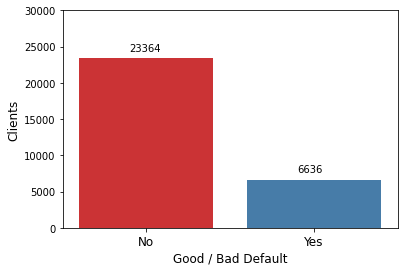

In [10]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="Default", data=df, palette="Set1")

plt.xlabel("Good / Bad Default", fontsize= 12)
plt.ylabel("Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+1000))
    
plt.show()

2. PIE CHART (OUTPUT DISTRIBUTION)

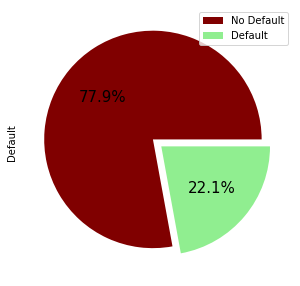

In [11]:
plt.figure(figsize=(5,5))

df['Default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['maroon','lightgreen'], explode = [0.05,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.show()

> LET CHECK CORRELATIONS:

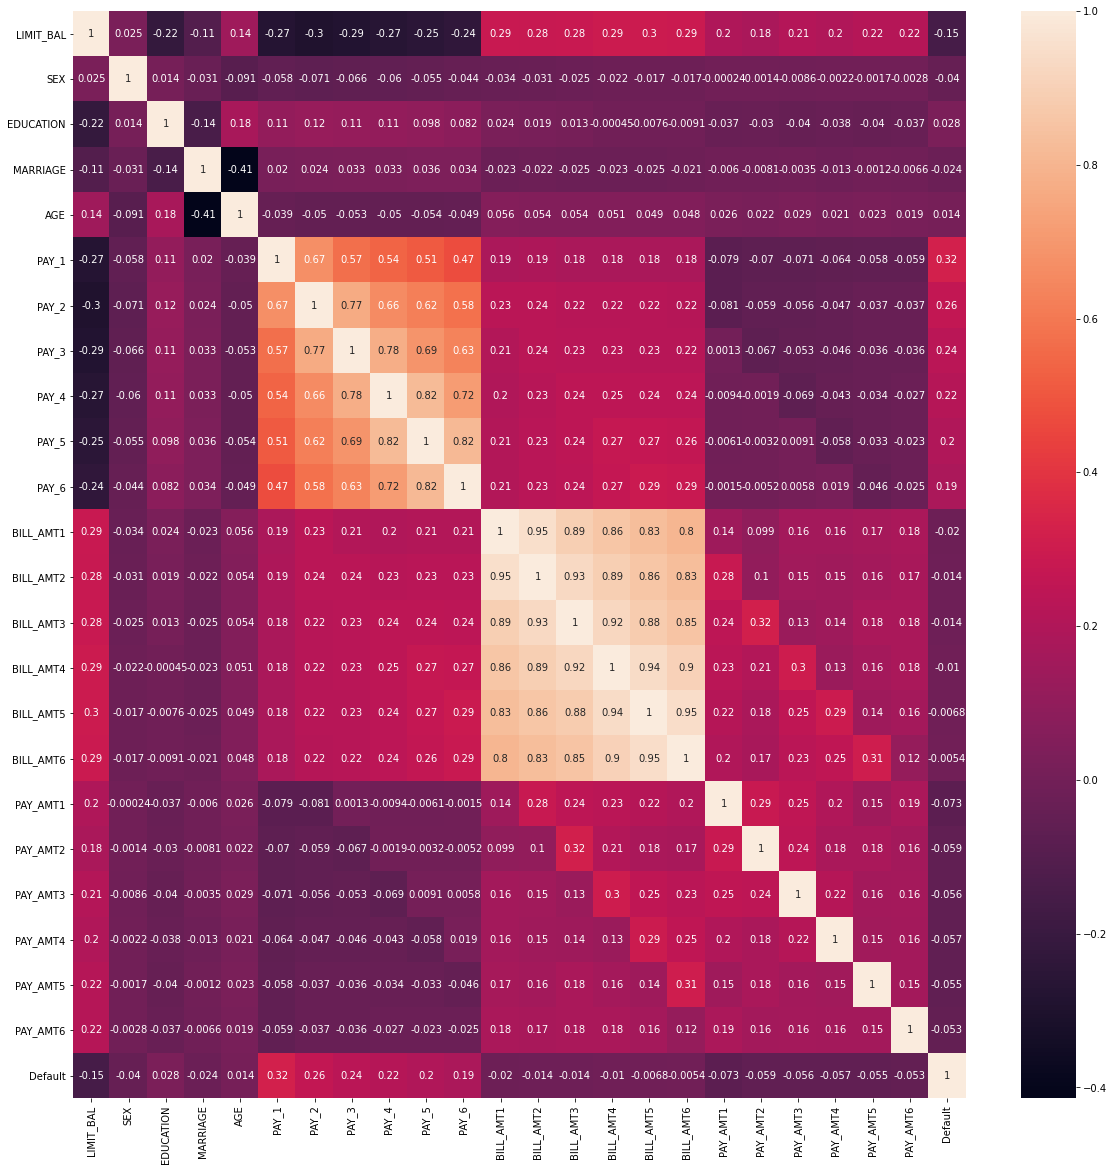

In [12]:

correlations = df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

NOW LETS START PLOTTING ATTRIBUTES

1. EFFECT OF SEX ON DEFAULT 

In [13]:
#-------------------------LETS SEE SEX ATTRIBUTE DIST. OVER DATA-------------------------
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [14]:
#-------------------------HENCE, DATA SEEMS ALMOST BALANCED OVER SEX ATTRIBUTE, LETS TRY VISUALISATION-------------------------

In [15]:
#-------------------------GET DATA FOR SEX V/S DEFAULT PLOT-------------------------
df['Default'].groupby(df['SEX']).value_counts(normalize = True)

SEX  Default
1    0          0.758328
     1          0.241672
2    0          0.792237
     1          0.207763
Name: Default, dtype: float64

A. SEX V/S DEFAULT ( o/p )

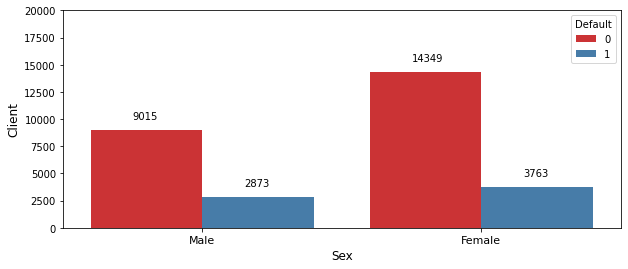

In [16]:
plt.figure(figsize=(10,4))

ax = sns.countplot(data = df, x = 'SEX', hue="Default", palette = 'Set1')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Client", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+1000))

plt.show()

BARPLOT FOR SEX V/S DEFAULT POSITIVE

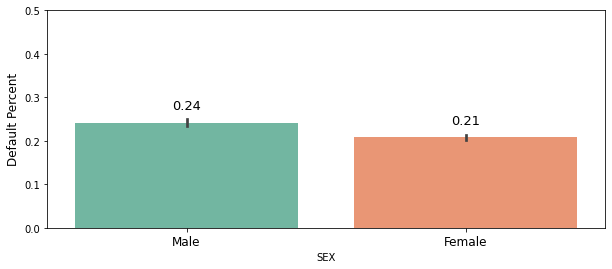

In [17]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "SEX", y = "Default", data = df, palette = 'Set2')

plt.ylabel("Default Percent", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

OUTCOMES FROM PLOTS AND DATA SCRUBBING:



*   It seems to have more women than men in our dataset and, apparently, men may have a slightly higher chance of default. 
*   Also, the Education Attribute seem to be somewhat unbiased hence, partially able to corrupt output as, according to DB it says, '4' ressemble to 'others' but eventually there are data with (0, 5, 6) with no label mentioned



REMEDIES TO BE TRIED:



*   We can try listing Education values --> (0,4,5,6) under same category as 'others'
*   As 5,6 values are originally referred to UNKNOWN and O has no ressemblance.




> But before that lets see, how many such case are existing and see the distribution overall














*   EDUCATION



In [18]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64



> Let's also check Default probability based on Education



In [19]:
df['Default'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  Default
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: Default, dtype: float64

There are few people on the 'unknown' categories (0, 5, 6) 
 I'll be making the choice of putting them together with the same value.

> Although their probabilities of default not lie in a closer range, I will go with the remedy I proposed earlier



---



> As, the probability is comparatively very less to the Defined Labels.





In [20]:
#-------------------------MERGING SAMPLES WITH VALUES: (0,5,6) to 5-------------------------
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)



> Checking Default probability based on Education after changes



In [21]:
df['Default'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  Default
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.924638
           1          0.075362
Name: Default, dtype: float64

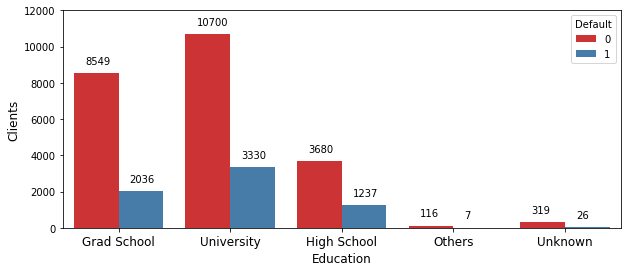

In [22]:
plt.figure(figsize=(10,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="Default", palette = 'Set1')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.10, p.get_height()+500))

plt.show()

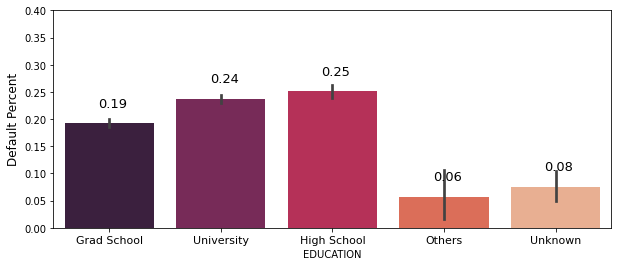

In [23]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "EDUCATION", y = "Default", data = df, palette = 'rocket')

plt.ylabel("Default Percent", fontsize= 12)
plt.ylim(0,0.4)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

OUTCOMES:



1.   Relevance of Education Attribute values follows : Grad School <-- University <-- High School <-- Others <-- Unknown
2.   Considering, just the First three values, it can easily concluded that "High Educates may ressemble a lower chance of Default"
3.   And Others & Unknown have a very distinguishable lower probability 







---


MARITIAL STATUS

In [24]:
#-------------------------ATTRIBUTE DISTRIBUTION-------------------------
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [25]:
#-------------------------ATTRIBUTE PROBABILITY DISTRIBUTION-------------------------
df['Default'].groupby(df['MARRIAGE']).value_counts(normalize = True)

MARRIAGE  Default
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: Default, dtype: float64

BARPLOT FOR MARITIAL STATUS V/S DEFAULT

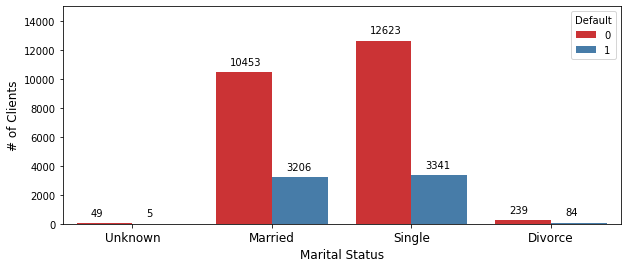

In [26]:
plt.figure(figsize=(10,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="Default", palette = 'Set1')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.10, p.get_height()+500))

plt.show()

BARPLOT FOR MARITIAL STATUS V/S DEFAULT POSITIVE

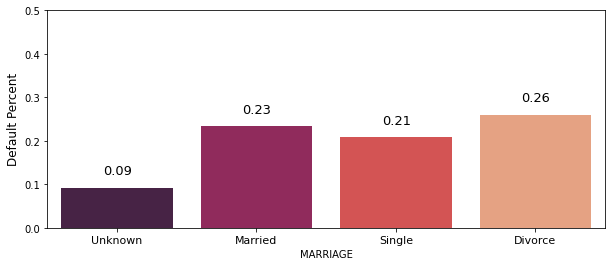

In [27]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "MARRIAGE", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("Default Percent", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

PLOT OUTCOMES


1.   Data is densely populated towards two values Married, Single
2.   Again Unknown category has least probability for default
3.   Among rest, Single has comparatively less probability for default





---





MULTI-ATTRIBUTE DEPENDENCY



> DEFAULT VALUE DEPENDENCY on SEX AND MARITIAL STATUS AS A WHOLE



In [28]:
df.groupby(by=['MARRIAGE', 'SEX'])['Default'].value_counts(normalize = True)

MARRIAGE  SEX  Default
0         1    0          0.857143
               1          0.142857
          2    0          0.925000
               1          0.075000
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.694656
               1          0.305344
          2    0          0.770833
               1          0.229167
Name: Default, dtype: float64

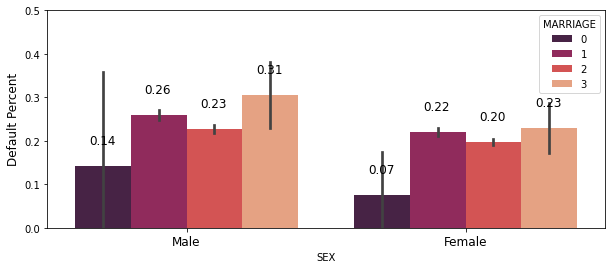

In [29]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "MARRIAGE", data = df, palette = 'rocket')

plt.ylabel("Default Percent", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+0.05),fontsize=12)

plt.show()

DEFAULT VALUE DEPENDENCY on SEX AND EDUCATION AS A WHOLE



In [30]:
df.groupby(by=[ 'SEX','EDUCATION'])['Default'].value_counts(normalize = True)

SEX  EDUCATION  Default
1    1          0          0.791915
                1          0.208085
     2          0          0.737998
                1          0.262002
     3          0          0.726131
                1          0.273869
     4          0          0.904762
                1          0.095238
     5          0          0.921875
                1          0.078125
2    1          0          0.818649
                1          0.181351
     2          0          0.777957
                1          0.222043
     3          0          0.763580
                1          0.236420
     4          0          0.962963
                1          0.037037
     5          0          0.926267
                1          0.073733
Name: Default, dtype: float64

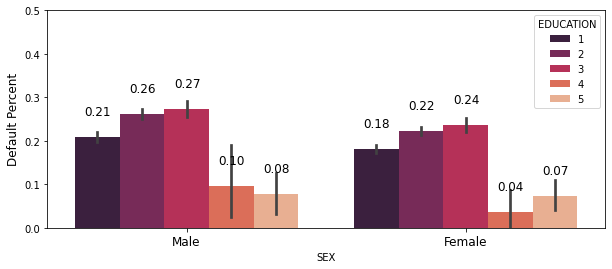

In [31]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "EDUCATION", data = df, palette = 'rocket')

plt.ylabel("Default Percent", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.05),fontsize=12)

plt.show()



> So, our very first outcome from Data Scrubbing, seems to be in right portion. As we can see, through multi-dependency as well attribute dependency plots, that the:
***THE PROBABIITY OF DEFAULT FOR MALE IS HIGHER***





---

AGE

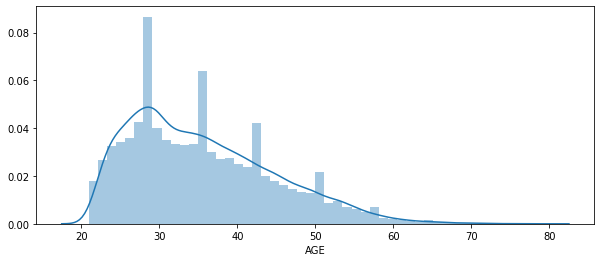

In [32]:
plt.figure(figsize=(10,4))

sns.distplot(df['AGE'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

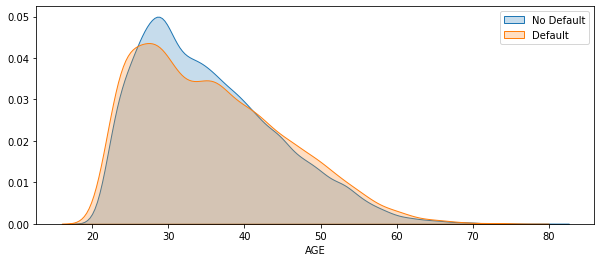

In [33]:
plt.figure(figsize=(10,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()



> Let see the Data Distribution over Span of Age



In [34]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 45, 50, 60, 80])
print(df['AgeBin'].value_counts())

(25, 30]    7142
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(40, 45]    3605
(45, 50]    2400
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64




> PROBABILITY OF DEFAULT FOR ABOVE AGE GROUPS



In [35]:
df['Default'].groupby(df['AgeBin']).value_counts(normalize = True)

AgeBin    Default
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 45]  0          0.778641
          1          0.221359
(45, 50]  0          0.749583
          1          0.250417
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: Default, dtype: float64

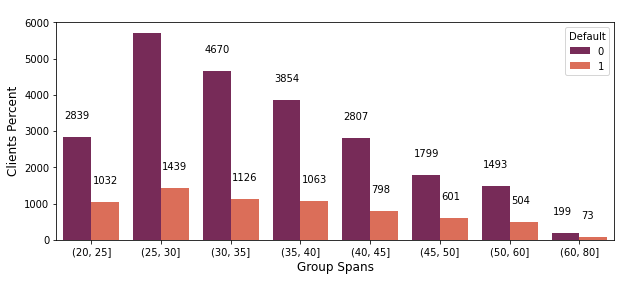

In [36]:
plt.figure(figsize=(10,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 45]', '(45, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="Default", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Group Spans", fontsize= 12)
plt.ylabel("Clients Percent", fontsize= 12)
plt.ylim(0,6000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.02, p.get_height()+500))

plt.show()

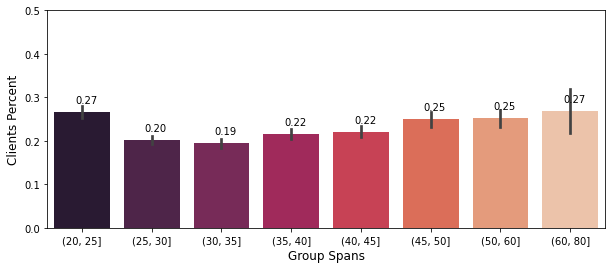

In [37]:
plt.figure(figsize=(10,4))

ax = sns.barplot(data = df, x = 'AgeBin', y="Default", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Group Spans", fontsize= 12)
plt.ylabel("Clients Percent", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate('%.2f' %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.02))

plt.show()



> The least probability of default are registered around 30-35 years span Users, while the highest occur at the 20-25 and 60+ span group.


---










> LIMIT_BAL



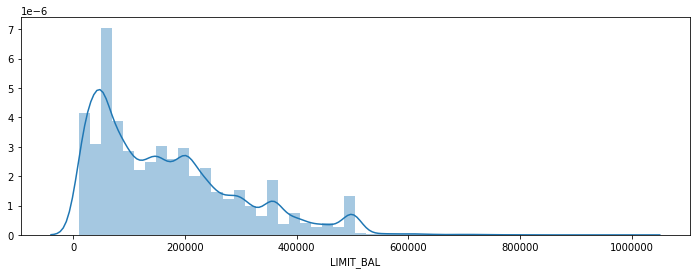

In [38]:
plt.figure(figsize=(12,4))

sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

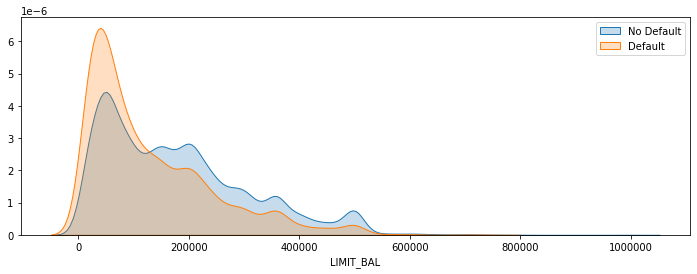

In [39]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.legend()
plt.show()



> Above plot tends to the information that, data is densely populated for Users for credit limit < 20000



> Lets see Numerical Distribution of LIMIT_BAL

In [40]:
df['Limit_Bal_Bin'] = pd.cut(df['LIMIT_BAL'],[1000, 50000, 100000, 150000, 200000, 250000, 300000, 400000, 500000, 1100000])
print(df['Limit_Bal_Bin'].value_counts())

(1000, 50000]        7676
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(200000, 250000]     2905
(300000, 400000]     2759
(250000, 300000]     2154
(400000, 500000]     1598
(500000, 1100000]     206
Name: Limit_Bal_Bin, dtype: int64


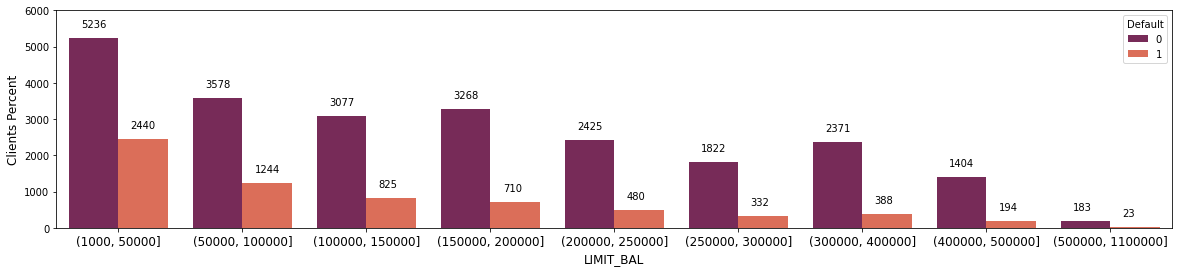

In [41]:
plt.figure(figsize=(20,4))

df['Limit_Bal_Bin'] = df['Limit_Bal_Bin'].astype('str')
LimitBin_order = ['(1000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 250000]', '(250000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = df, x = 'Limit_Bal_Bin', hue="Default", palette = 'rocket', order = LimitBin_order)

plt.xlabel("LIMIT_BAL", fontsize= 12)
plt.ylabel("Clients Percent", fontsize= 12)
plt.ylim(0,6000)
ax.tick_params(axis="x", labelsize= 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+300))

plt.show()

> Probablity Distribution of LIMIT_BAL for DEFAULT

In [42]:
df['Default'].groupby(df['Limit_Bal_Bin']).value_counts(normalize = True)

Limit_Bal_Bin      Default
(1000, 50000]      0          0.682126
                   1          0.317874
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 250000]   0          0.834768
                   1          0.165232
(250000, 300000]   0          0.845868
                   1          0.154132
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(50000, 100000]    0          0.742016
                   1          0.257984
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: Default, dtype: float64

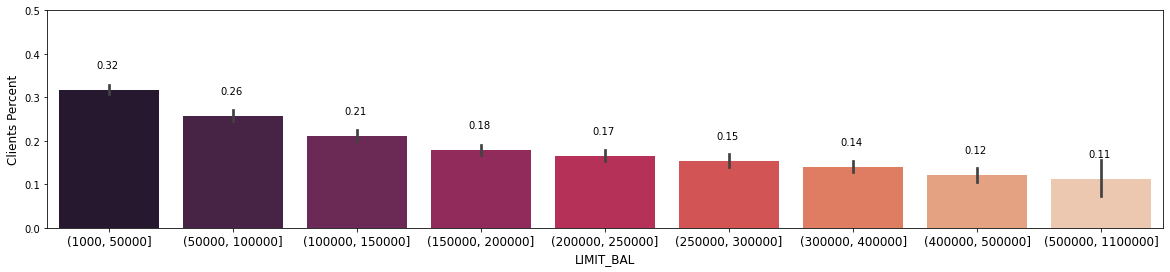

In [43]:
plt.figure(figsize=(20,4))

df['Limit_Bal_Bin'] = df['Limit_Bal_Bin'].astype('str')
LimitBin_order = ['(1000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 250000]', '(250000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.barplot(data = df, x = 'Limit_Bal_Bin', y="Default", palette = 'rocket', order = LimitBin_order)

plt.xlabel("LIMIT_BAL", fontsize= 12)
plt.ylabel("Clients Percent", fontsize= 12)
plt.ylim(0,0.5)
ax.tick_params(axis="x", labelsize= 12)

for p in ax.patches:
    ax.annotate('%.2f' %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.05))

plt.show()



*   CONCLUSIONS FROM PLOTS

> It is clear from plot that the User with less credit limit has higher Default positive probability.


---





>MEAN LIMT_BAL FOR ATTRIBUTES



> SEX ATTRIBUTE V/S LIMIT_BAL ATTRIBUTE 



In [44]:
df.groupby('SEX')['LIMIT_BAL'].mean()

SEX
1    163519.825034
2    170086.462014
Name: LIMIT_BAL, dtype: float64

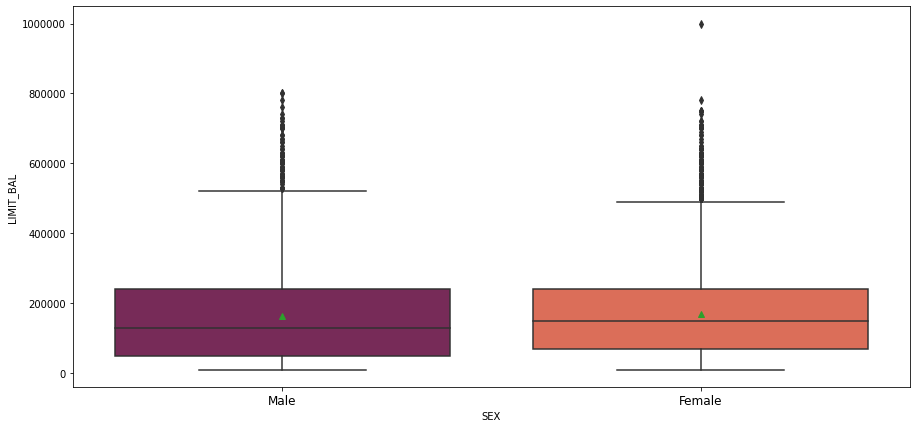

In [45]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()



> EDUCATION ATTRIBUTE V/S LIMIT_BAL ATTRIBUTE



In [46]:
df.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    167205.797101
Name: LIMIT_BAL, dtype: float64

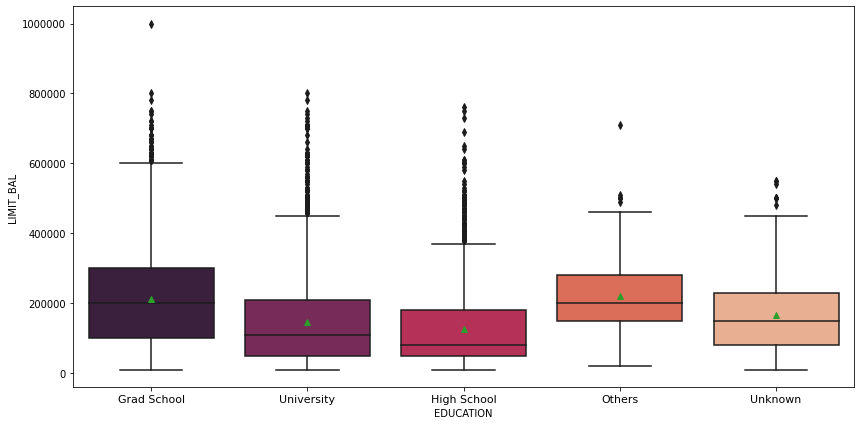

In [47]:
plt.figure(figsize=(14,7))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, )

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()



> MARITIAL STATUS V/S LIMIT_BAL



In [48]:
df.groupby('MARRIAGE')['LIMIT_BAL'].mean()

MARRIAGE
0    132962.962963
1    182200.893184
2    156413.660737
3     98080.495356
Name: LIMIT_BAL, dtype: float64

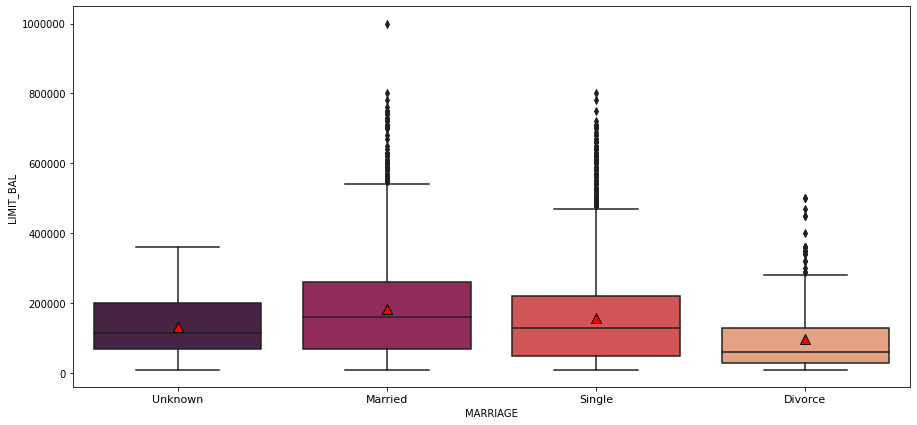

In [49]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

> AGE GROUPS V/S LIMIT_BAL

In [50]:
df.groupby('AgeBin')['LIMIT_BAL'].mean()

AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 45]    184157.470180
(45, 50]    172955.000000
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

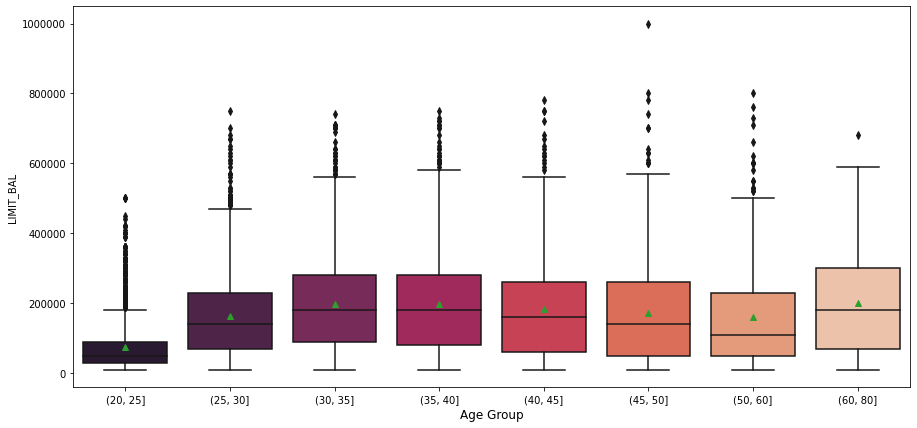

In [51]:
plt.figure(figsize=(15, 7))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",data = df, palette = 'rocket', order = AgeBin_order, showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

> MEAN LIMIT_BAL PLOTTING OUTCOMES:


1.   SEX             : FEMALE have higher avg. credit limit
2.   EDUCATION       : GRAD SCHOOL Users have higher avg. credit limit
3.   MARITIAL STATUS : MARRIED Users have higher avg. credit limit
4.   AGE GROUP       : 60+ Aged Group have higher avg. credit limit

> Overall FEMALE has been seem to have a higher avg. credit limit i.e. LIMIT_BAL


---











> ATTRIBUTE DEPENDENCY W.R.T SEX ATTRIBUTE FOR LIMIT_BAL



> EDUCATION

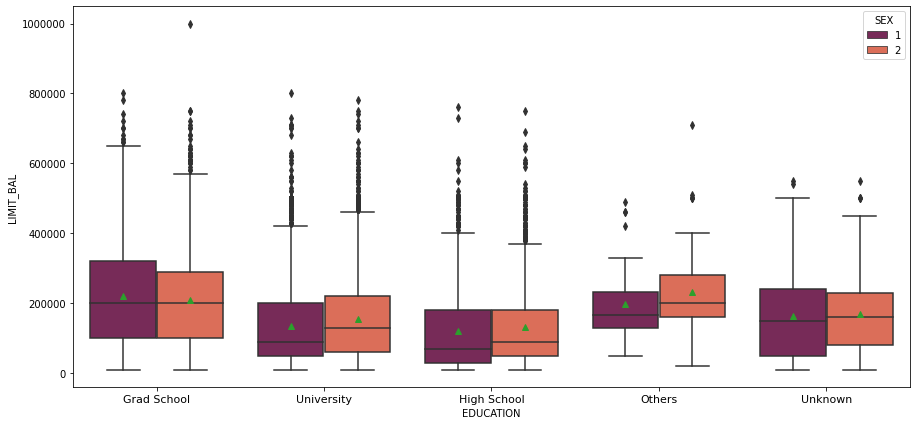

In [52]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

> MARITIAL STATUS

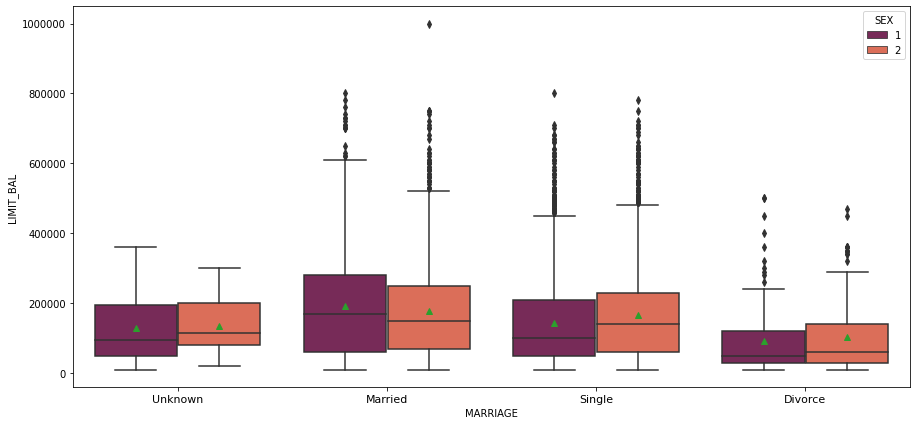

In [53]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

> AGE GROUPS - AgeBin

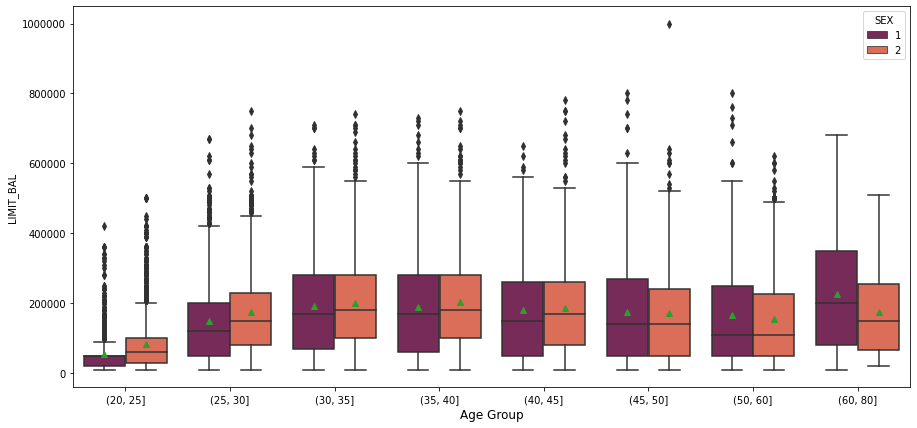

In [54]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', order = AgeBin_order, showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()



> ATTRIBUTE DEPENDENCY W.R.T EDUCATION ATTRIBUTE FOR LIMIT_BAL



>SEX ATTRIBUTE

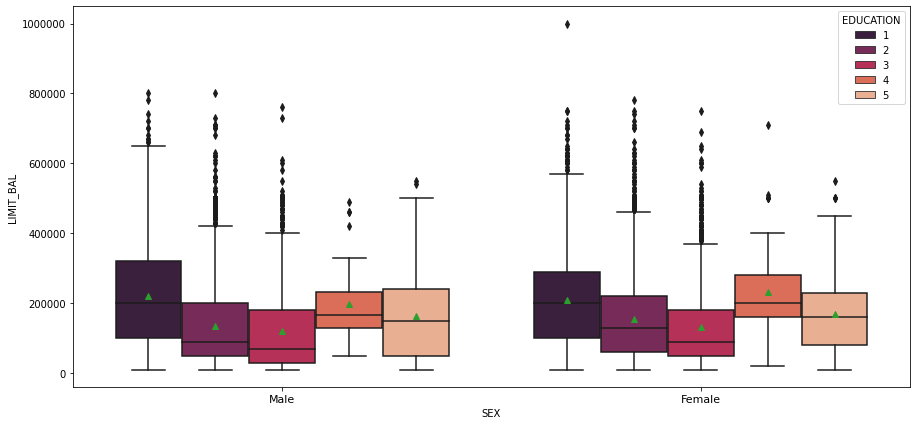

In [55]:
plt.figure(figsize=(15,7))

sns.boxplot(hue = "EDUCATION", y = "LIMIT_BAL", x = 'SEX', data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1],['Male','Female'], fontsize = 11)

plt.show()

>MARITIAL STATUS

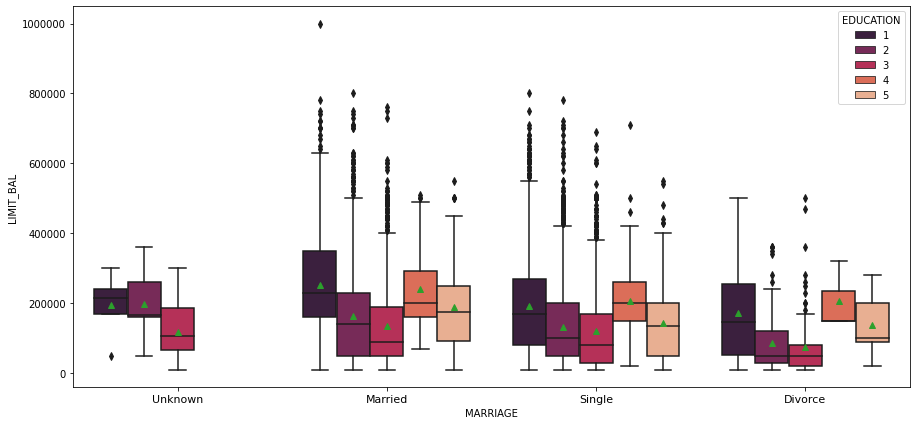

In [56]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'EDUCATION', data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

> AGE GROUPS

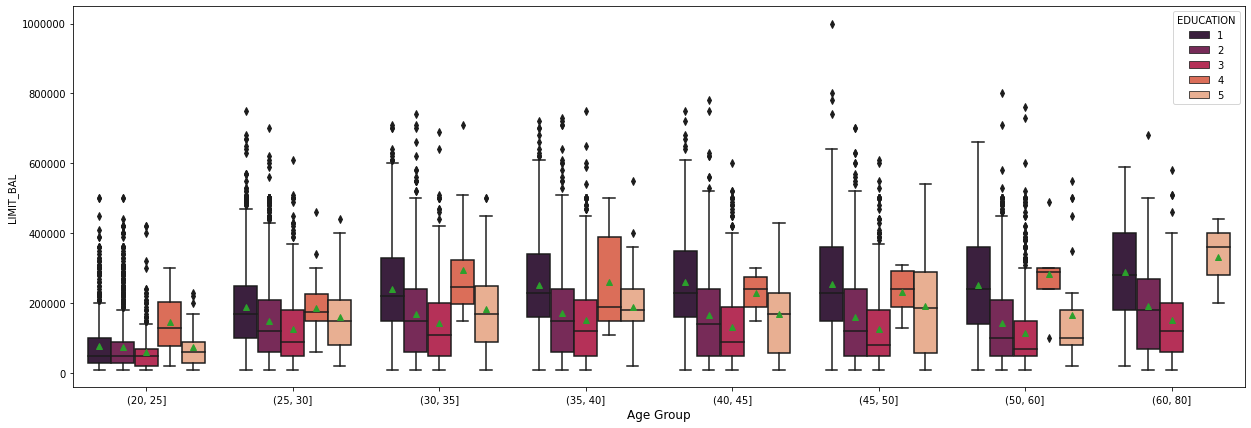

In [57]:
plt.figure(figsize=(21,7))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'EDUCATION', data = df, palette = 'rocket', order = AgeBin_order, showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

>

>ATTRIBUTE DEPENDENCY W.R.T MARITIAL STATUS FOR LIMIT_BAL


> SEX

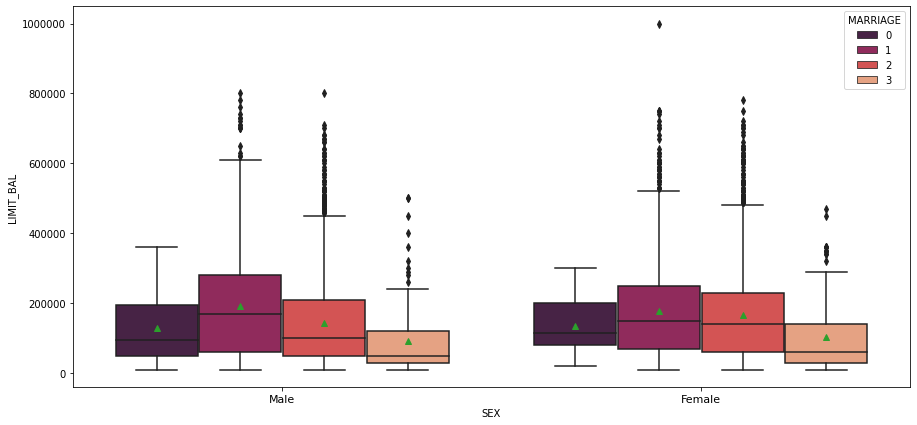

In [58]:
plt.figure(figsize=(15,7))

sns.boxplot(hue = "MARRIAGE", y = "LIMIT_BAL", x = 'SEX', data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1],['Male','Female'], fontsize = 11)

plt.show()

> EDUCATION

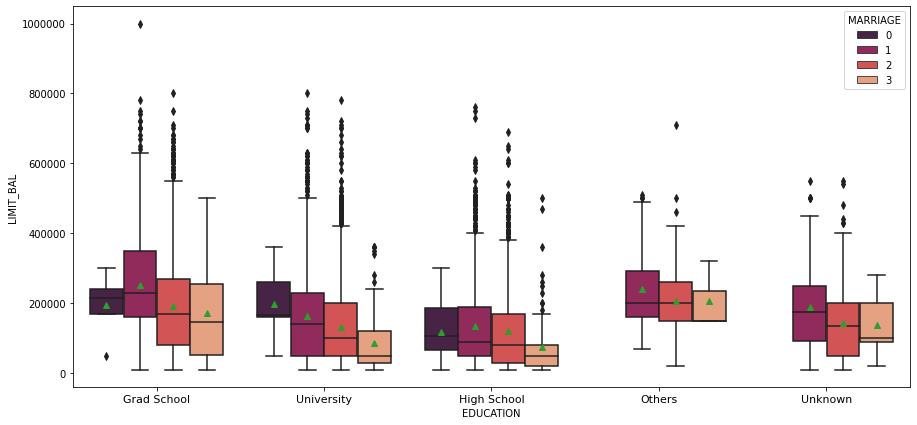

In [59]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", hue = 'MARRIAGE', data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

> AGE GROUP

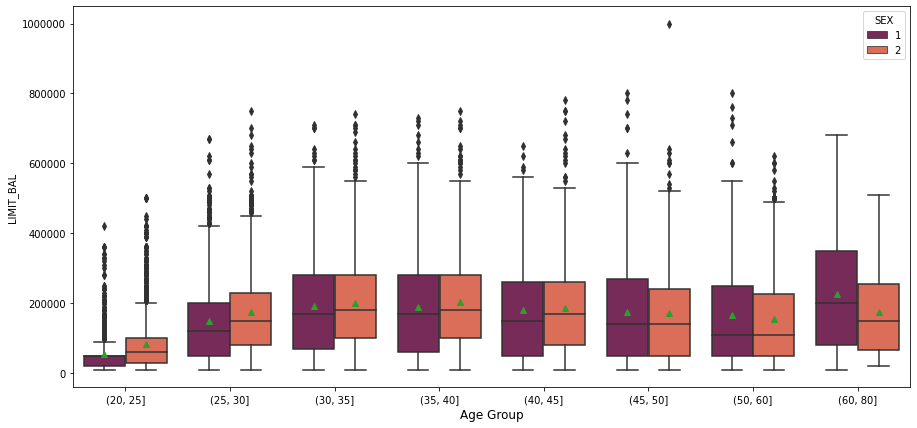

In [60]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', order = AgeBin_order, showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

>ATTRIBUTE DEPENDENCY W.R.T AGE GROUPS FOR LIMIT_BAL

> SEX

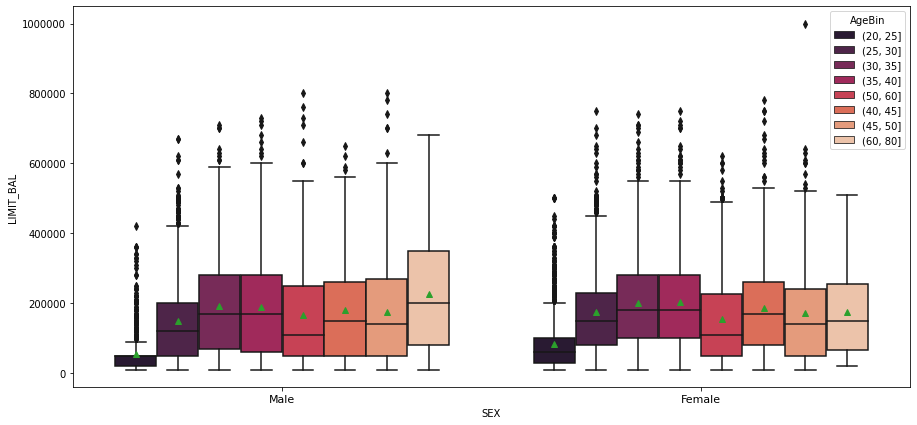

In [61]:
plt.figure(figsize=(15,7))

sns.boxplot(hue = "AgeBin", y = "LIMIT_BAL", x = 'SEX', data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1],['Male','Female'], fontsize = 11)

plt.show()

> EDUCATION

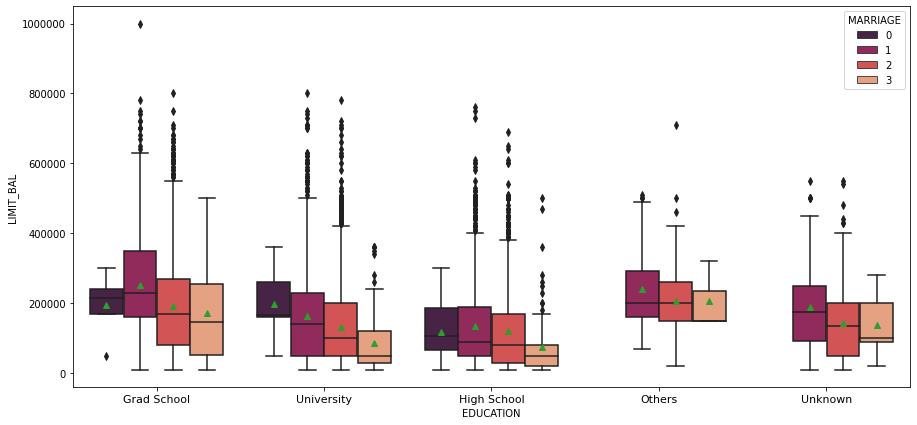

In [62]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", hue = 'MARRIAGE', data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

> MARITIAL STATUS

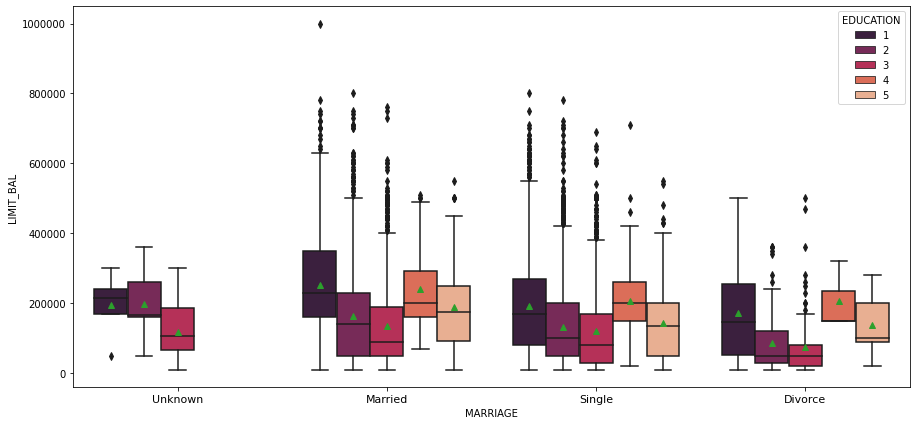

In [63]:
plt.figure(figsize=(15,7))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'EDUCATION', data = df, palette = 'rocket', showmeans=True)

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

> PLOT OUTCOMES

1.  So, it seems 'MALE' with '60+' Age group and belong to 'Others' EDUCATION Category has highest Avg. Cred Limit
2.  Same is seen in 'MARRIED' category as well for 'Grad EDUCATION' Category
3.  While for Grad category LIMIT_BAL mean is almost same.
4.  While no pattern can be visualised for SEX attribute along with EDUCATION for LIMIT_BAL

PAY_X

>PMF

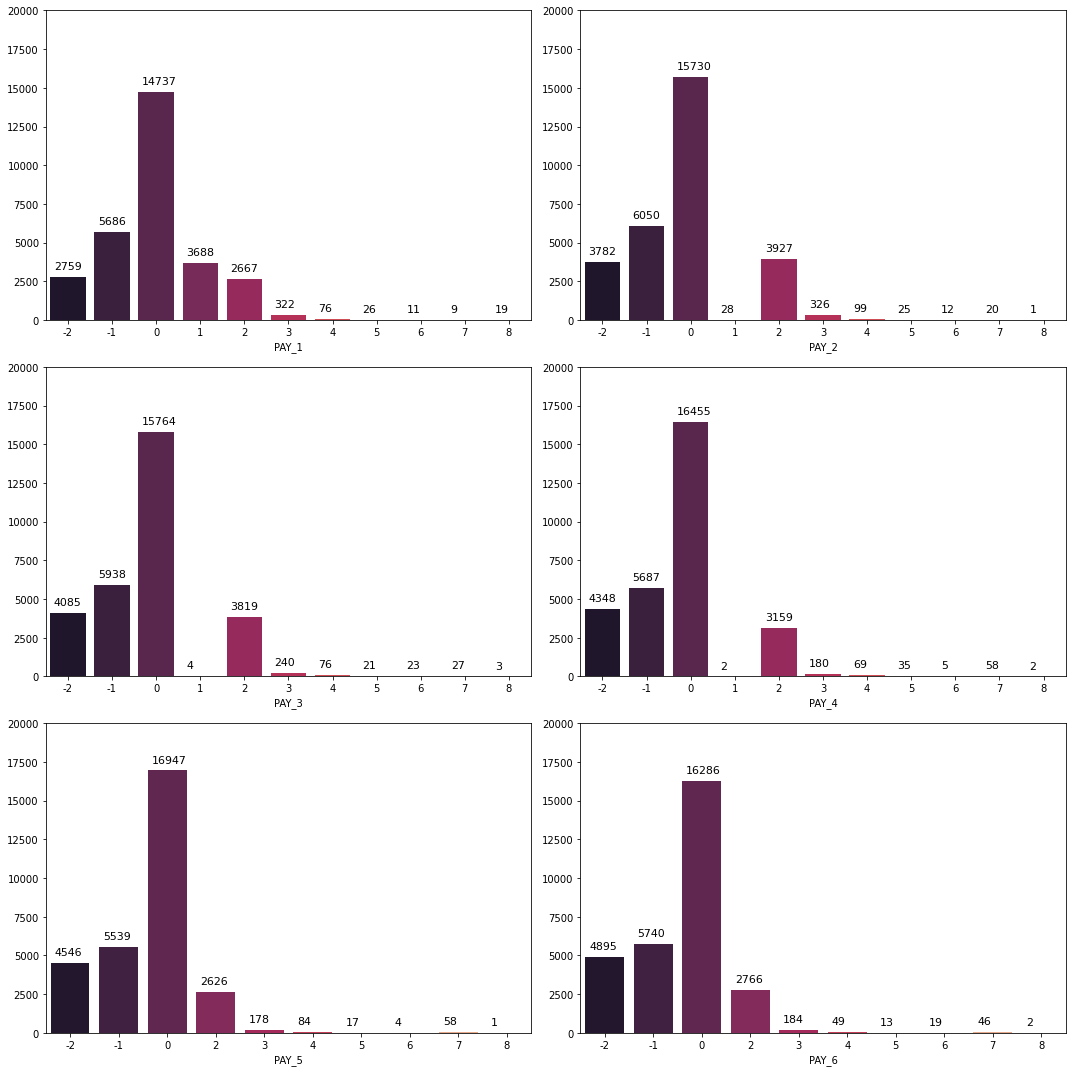

In [64]:
pay_x_feat = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,15))

for i,col in enumerate(pay_x_feat):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

> From Plots we can conclude that most of the users pays Amount back before 4 months delay

>PDF

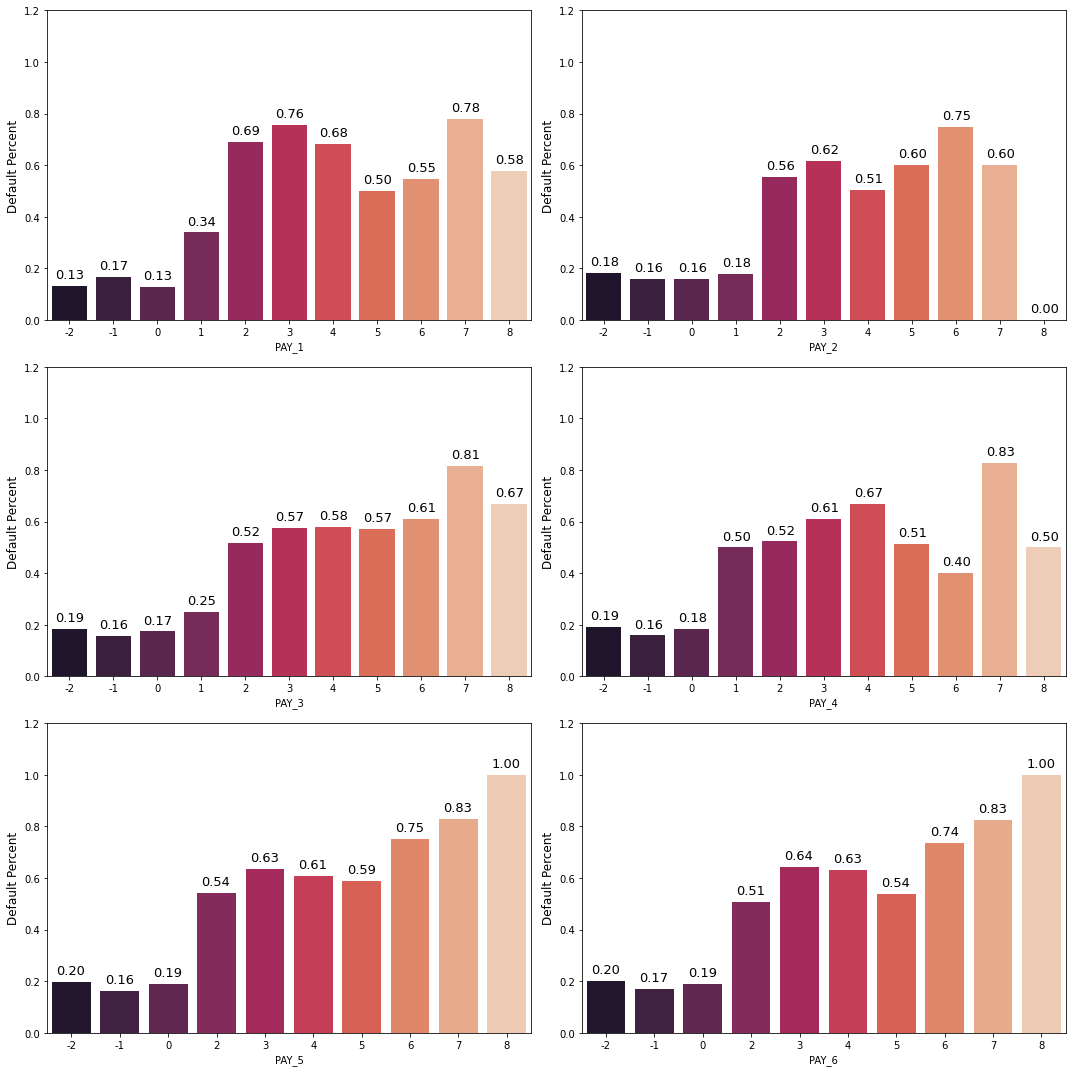

In [65]:
plt.figure(figsize=(15,15))

for i,col in enumerate(pay_x_feat):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("Default Percent", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

> LETS MERGE LABELS WITH 4,5,67...

In [66]:
df['PAY_1_new'] = df['PAY_1'].copy()
df['PAY_2_new'] = df['PAY_2'].copy()
df['PAY_3_new'] = df['PAY_3'].copy()
df['PAY_4_new'] = df['PAY_4'].copy()
df['PAY_5_new'] = df['PAY_5'].copy()
df['PAY_6_new'] = df['PAY_6'].copy()

In [67]:
pay_x_new = ['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']

for col in pay_x_new:  
    df.loc[:,col] = df.loc[:,col].replace(5,4)
    df.loc[:,col] = df.loc[:,col].replace(6,4)
    df.loc[:,col] = df.loc[:,col].replace(7,4)
    df.loc[:,col] = df.loc[:,col].replace(8,4)

> PLOTTING MODIFIED PAY_X FEATURES

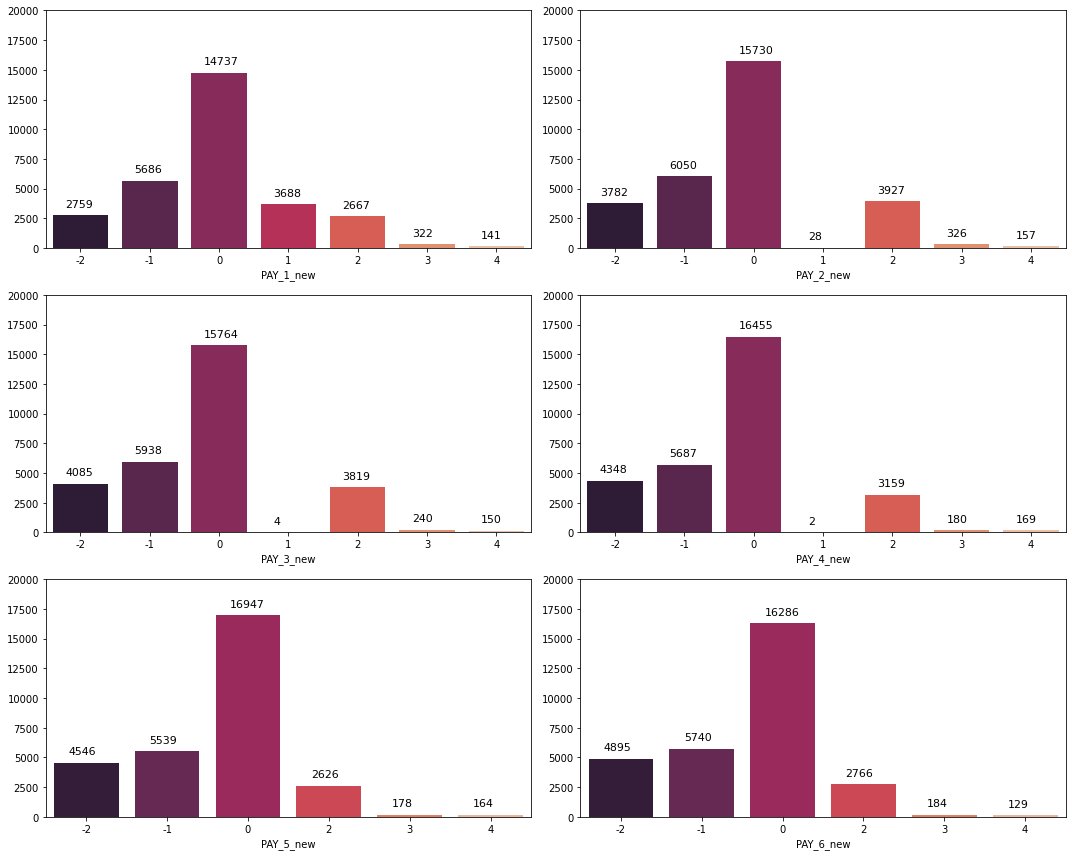

In [68]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+700), fontsize = 11)

plt.show()

>PROBABILITY FOR DEFAULT POSITIVE

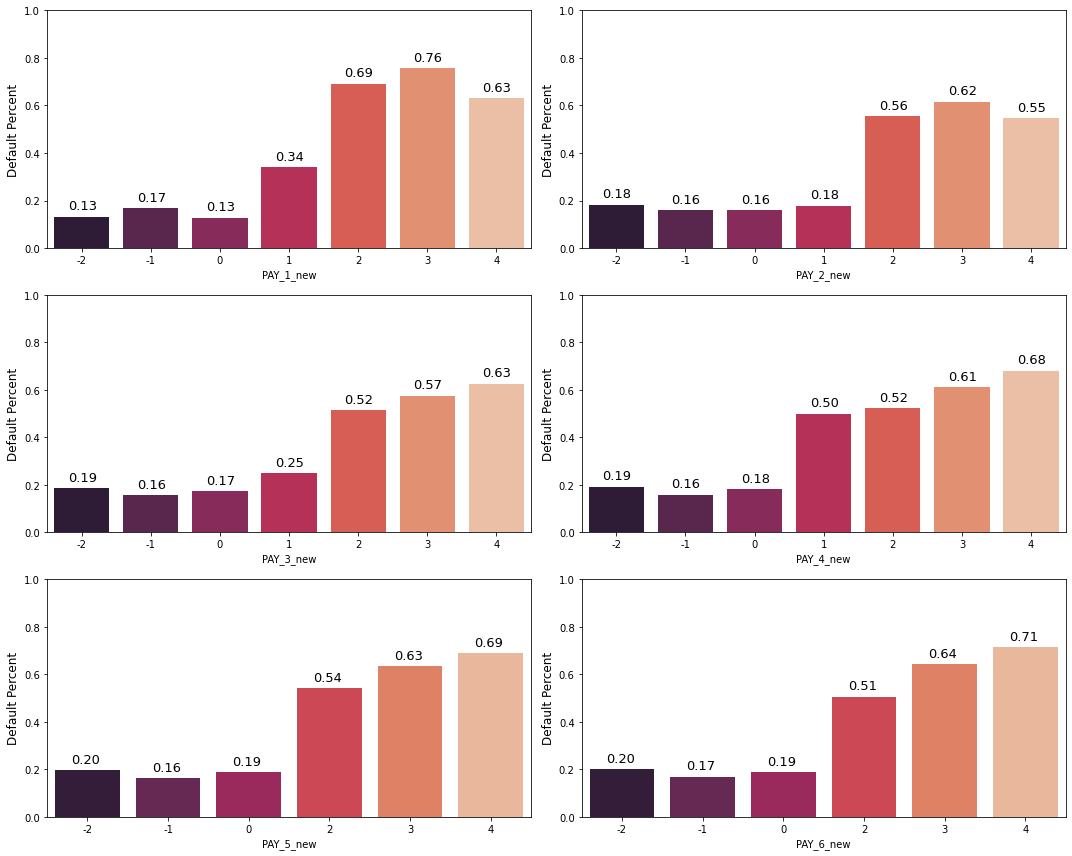

In [69]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("Default Percent", fontsize= 12)
    plt.ylim(0,1.0)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.2, p.get_height()+0.03),fontsize=13)

plt.show()

>BILL_AMTX

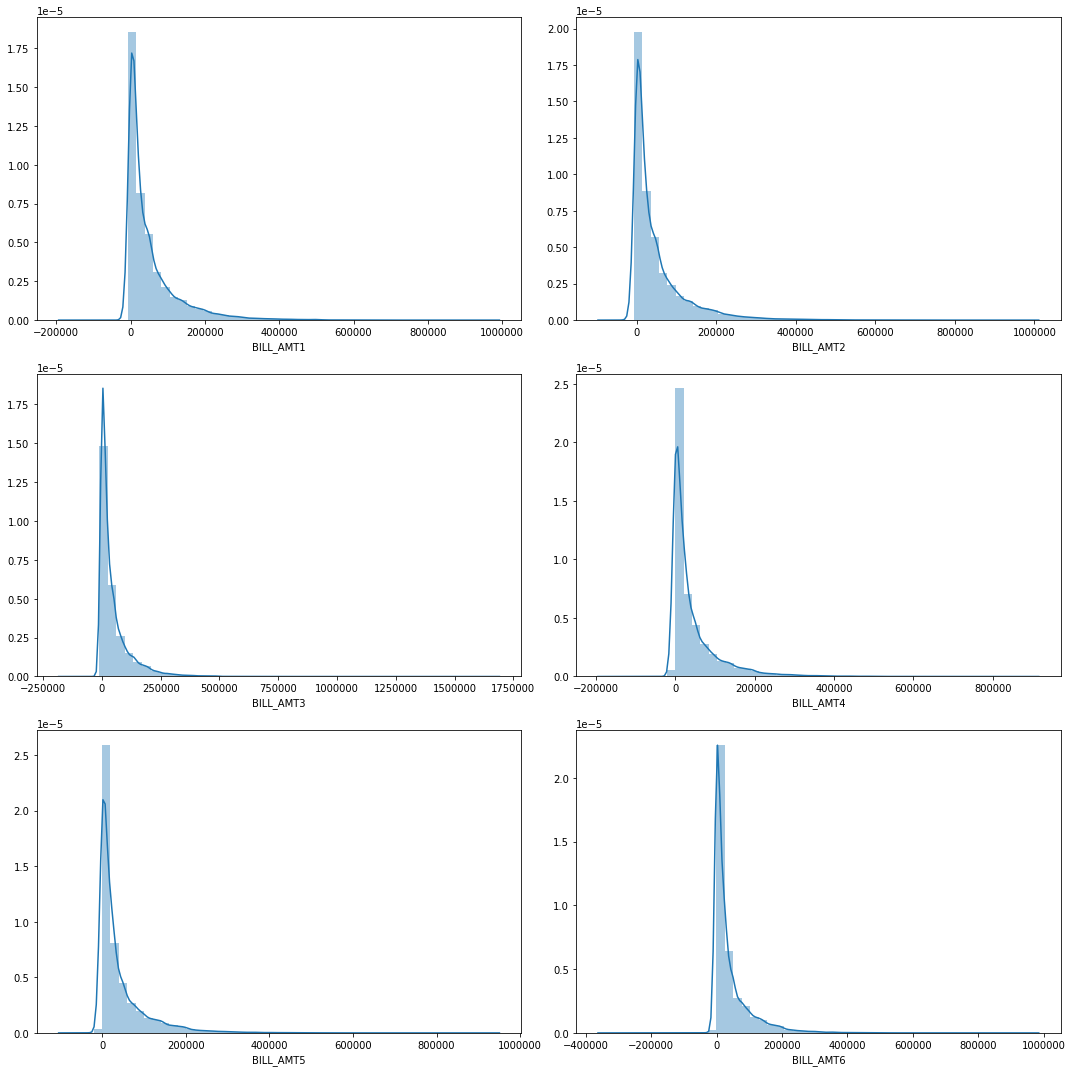

In [70]:
bill_amtx_feat = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,15))

for i,col in enumerate(bill_amtx_feat):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.ylabel('')
    plt.tight_layout()

plt.show()

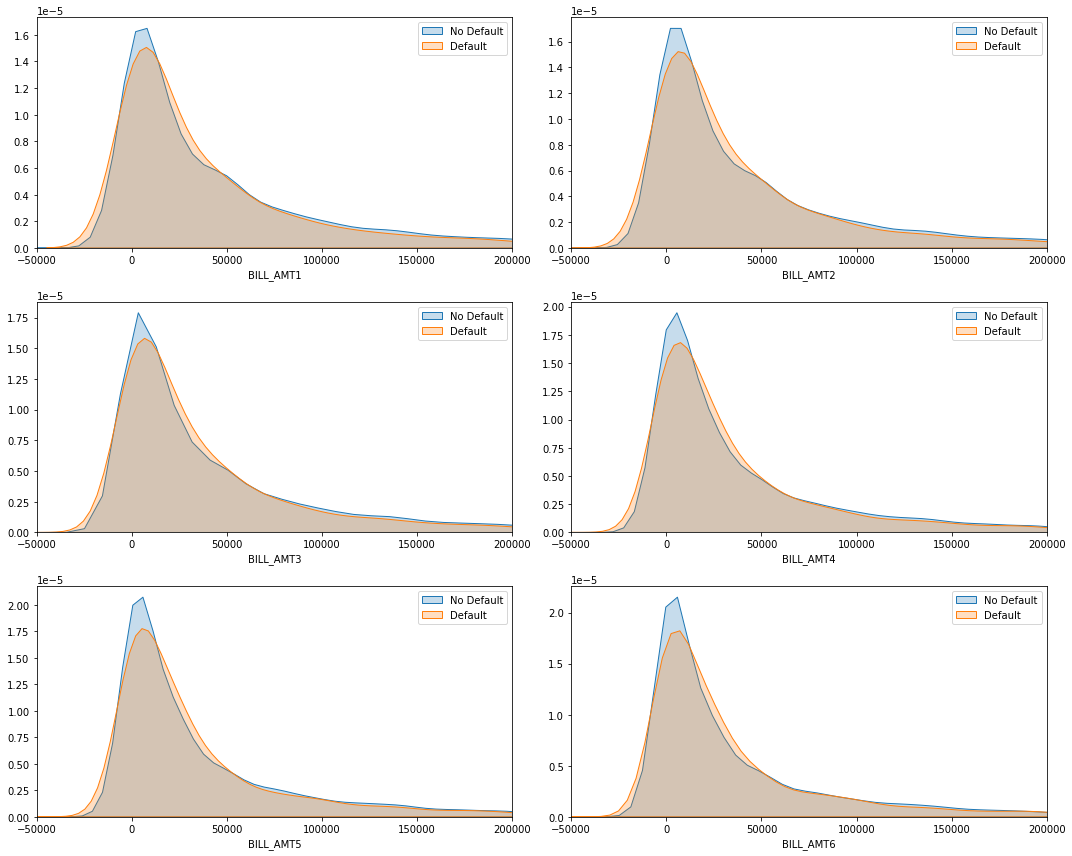

In [71]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_feat):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [72]:
df['BILL_AMT1_new'] = df['BILL_AMT1'].copy()
df['BILL_AMT2_new'] = df['BILL_AMT2'].copy()
df['BILL_AMT3_new'] = df['BILL_AMT3'].copy()
df['BILL_AMT4_new'] = df['BILL_AMT4'].copy()
df['BILL_AMT5_new'] = df['BILL_AMT5'].copy()
df['BILL_AMT6_new'] = df['BILL_AMT6'].copy()

> CHECKING DATA DISTRIBUTIION OVER BILL_AMT SPAN

In [73]:
bill_amtx_feat_new = ['BILL_AMT1_new', 'BILL_AMT2_new', 'BILL_AMT3_new', 'BILL_AMT4_new', 'BILL_AMT5_new', 'BILL_AMT6_new']

for i, col in enumerate (bill_amtx_feat_new):
    df[col] = pd.cut(df[bill_amtx_feat[i]],[-400000,-1,0,25000, 70000, 90000, 200000, 2000000])
    print(df[col].value_counts())

(0, 25000]           12965
(25000, 70000]        7226
(90000, 200000]       4017
(-1, 0]               2008
(70000, 90000]        1671
(200000, 2000000]     1523
(-400000, -1]          590
Name: BILL_AMT1_new, dtype: int64
(0, 25000]           12647
(25000, 70000]        7272
(90000, 200000]       3911
(-1, 0]               2506
(70000, 90000]        1603
(200000, 2000000]     1392
(-400000, -1]          669
Name: BILL_AMT2_new, dtype: int64
(0, 25000]           12696
(25000, 70000]        7198
(90000, 200000]       3750
(-1, 0]               2870
(70000, 90000]        1575
(200000, 2000000]     1256
(-400000, -1]          655
Name: BILL_AMT3_new, dtype: int64
(0, 25000]           13081
(25000, 70000]        6983
(90000, 200000]       3546
(-1, 0]               3195
(70000, 90000]        1495
(200000, 2000000]     1025
(-400000, -1]          675
Name: BILL_AMT4_new, dtype: int64
(0, 25000]           13401
(25000, 70000]        6784
(-1, 0]               3506
(90000, 200000]       3368


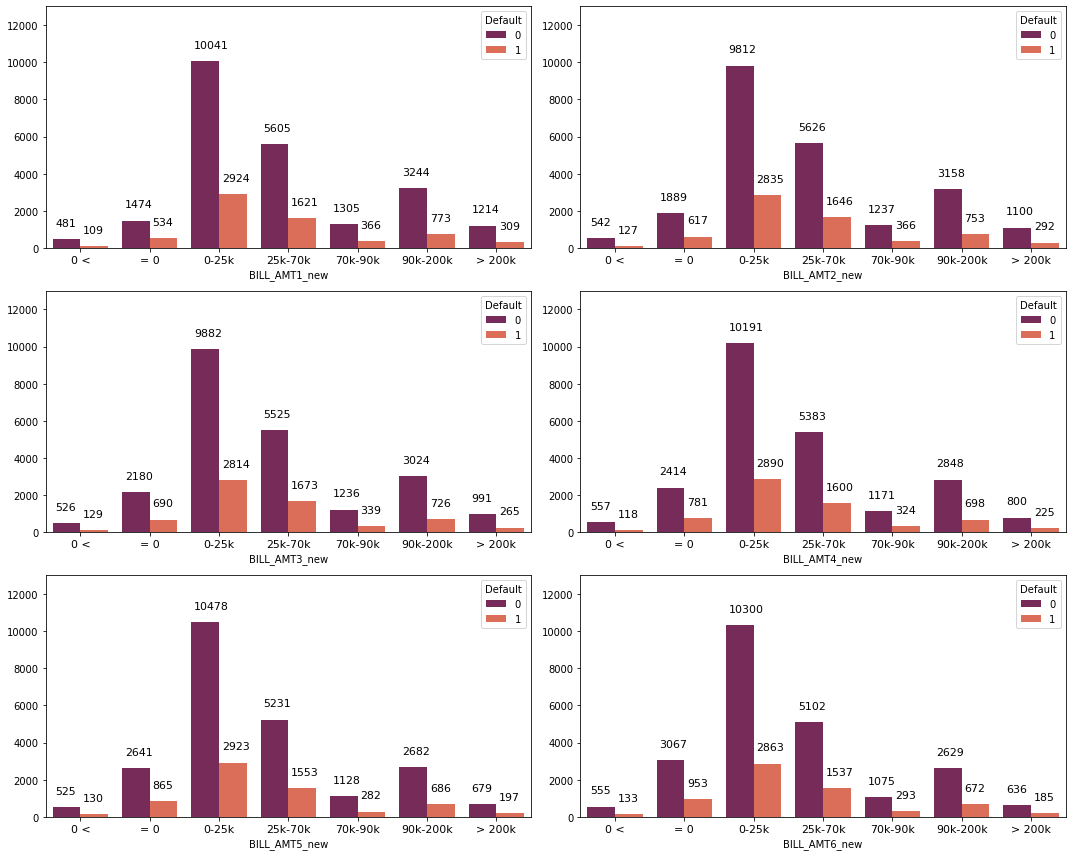

In [74]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_feat_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5,6],['0 <', '= 0', '0-25k', '25k-70k', '70k-90k', '90k-200k', '> 200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
        
plt.show()

> CHECKING PROBABILITY DISTRIBUTION OVER BILL_AMT

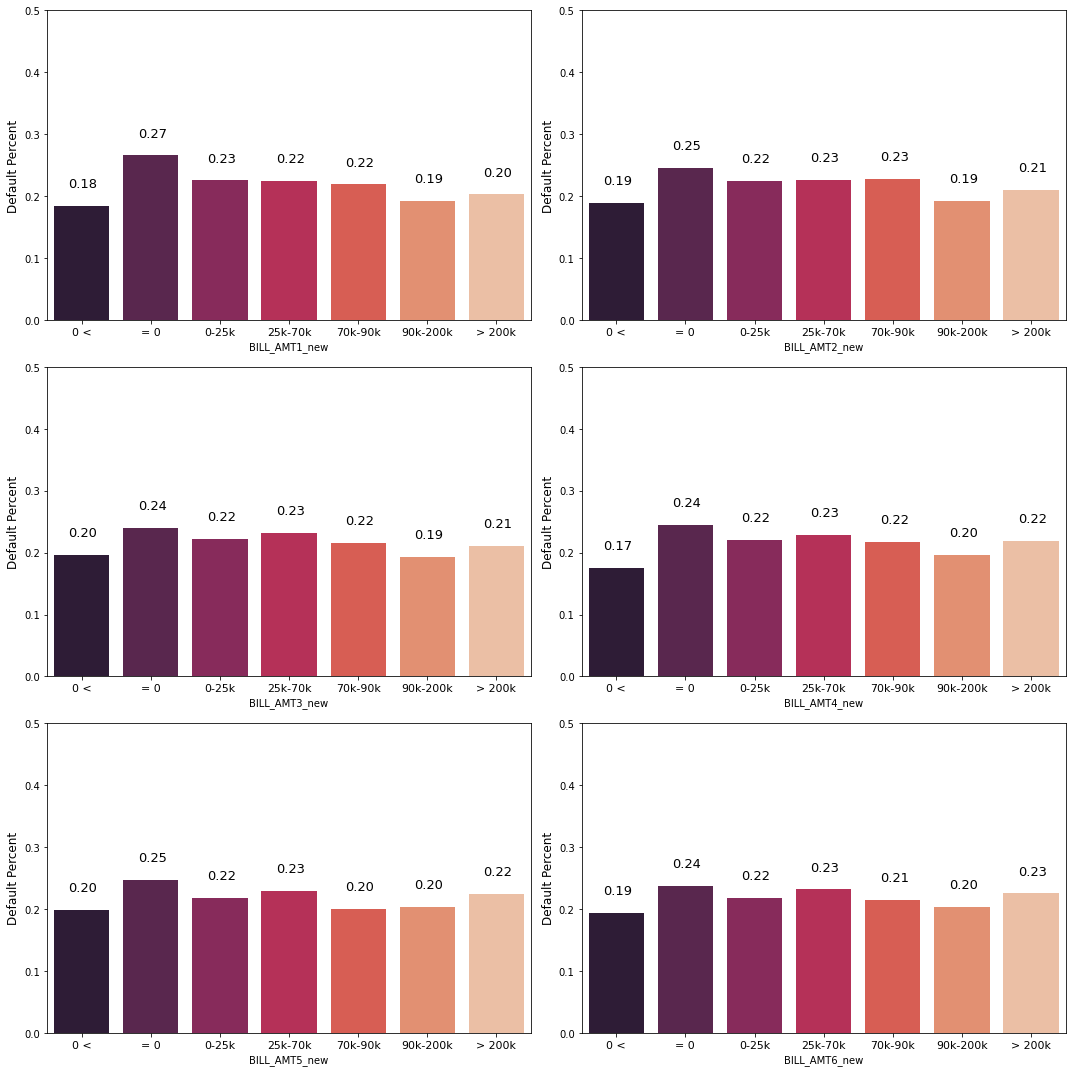

In [75]:
plt.figure(figsize=(15,15))

for i,col in enumerate(bill_amtx_feat_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("Default Percent", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5,6],['0 <', '= 0', '0-25k', '25k-70k', '70k-90k', '90k-200k', '> 200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

>PREVIOUS PAYMENT - PAY_AMTX

> DATA DISTRIBUTION

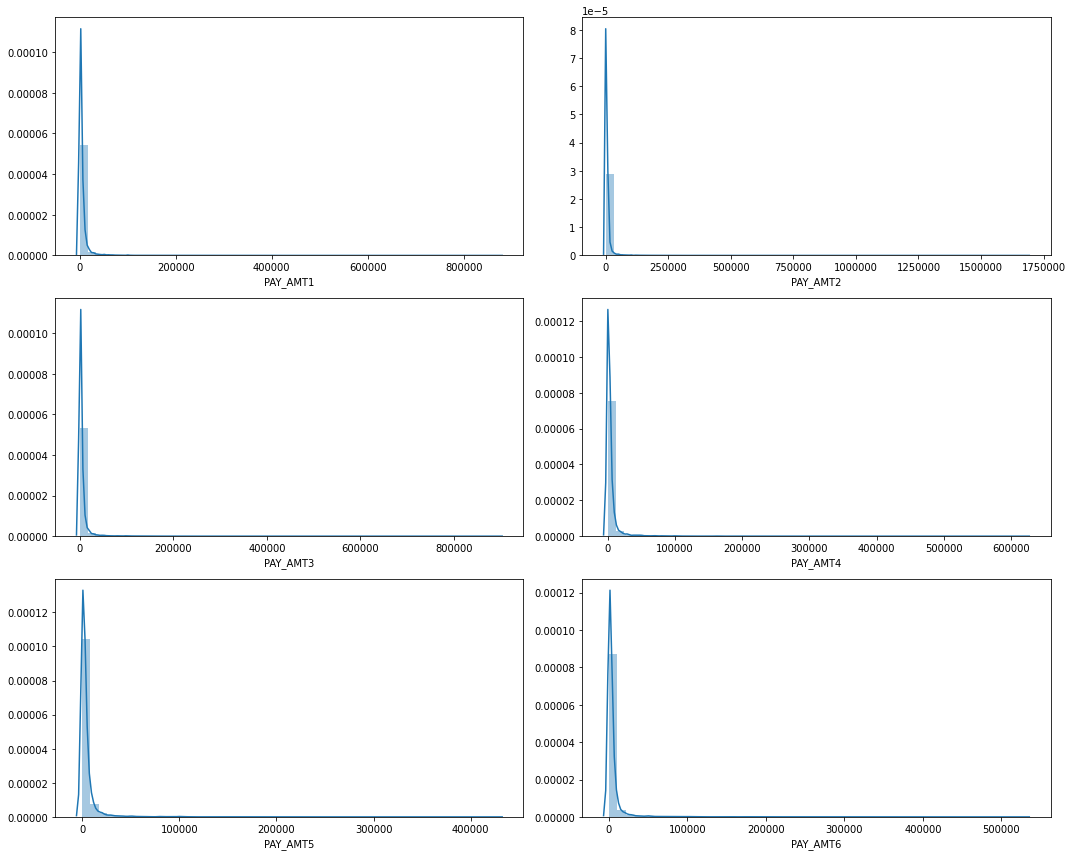

In [76]:
pay_amtx_feat = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_feat):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

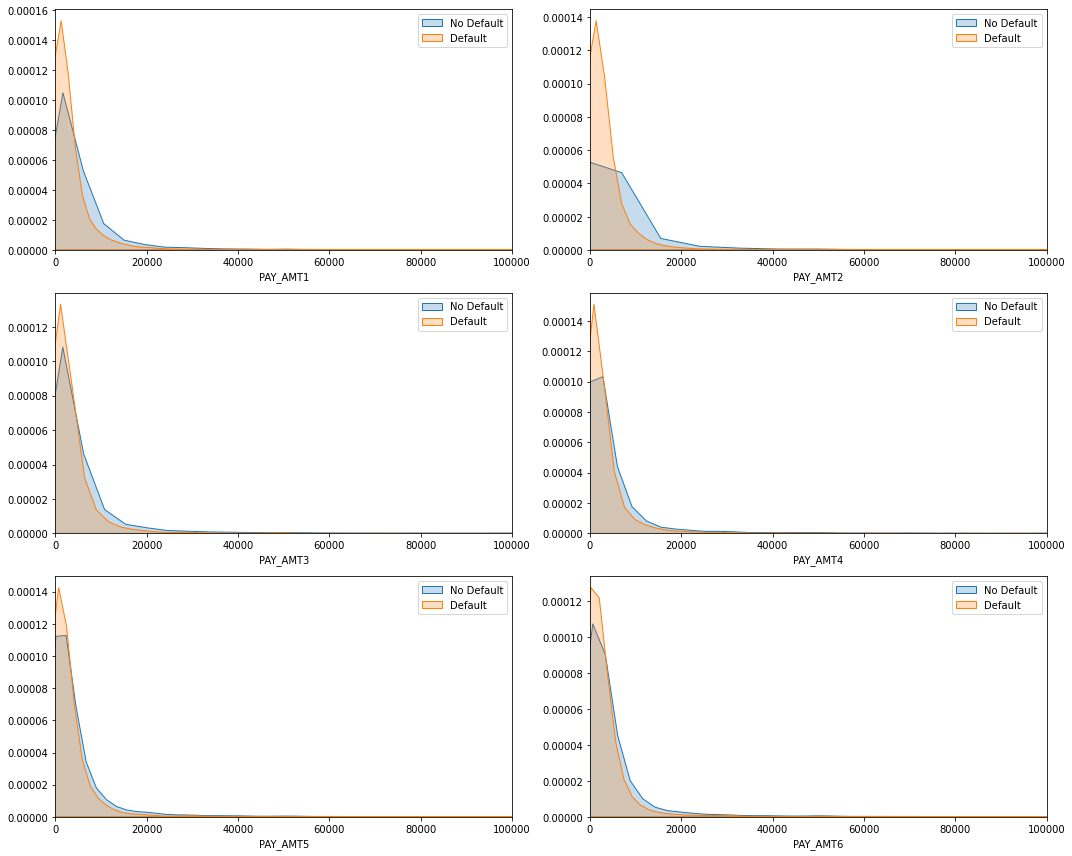

In [77]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_feat):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

> CHECKING DATA DISTRIBUTION OVER SPANS

In [78]:
df['PAY_AMT1_new'] = df['PAY_AMT1'].copy()
df['PAY_AMT2_new'] = df['PAY_AMT2'].copy()
df['PAY_AMT3_new'] = df['PAY_AMT3'].copy()
df['PAY_AMT4_new'] = df['PAY_AMT4'].copy()
df['PAY_AMT5_new'] = df['PAY_AMT5'].copy()
df['PAY_AMT6_new'] = df['PAY_AMT6'].copy()

In [79]:
pay_amtx_new = ['PAY_AMT1_new', 'PAY_AMT2_new', 'PAY_AMT3_new', 'PAY_AMT4_new', 'PAY_AMT5_new', 'PAY_AMT6_new']

for i, col in enumerate (pay_amtx_new):
    df[col] = pd.cut(df[pay_amtx_feat[i]],[-1, 0, 25000, 50000, 75000, 100000, 2000000])
    print(df[col].value_counts())

(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 75000]         221
(100000, 2000000]      149
(75000, 100000]        101
Name: PAY_AMT1_new, dtype: int64
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(100000, 2000000]      196
(50000, 75000]         171
(75000, 100000]        112
Name: PAY_AMT2_new, dtype: int64
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(100000, 2000000]      177
(50000, 75000]         173
(75000, 100000]        100
Name: PAY_AMT3_new, dtype: int64
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 75000]         170
(100000, 2000000]      147
(75000, 100000]        101
Name: PAY_AMT4_new, dtype: int64
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 75000]         159
(100000, 2000000]      154
(75000, 100000]        109
Name: PAY_AMT5_new, dtype: int64
(0, 25000]           2178

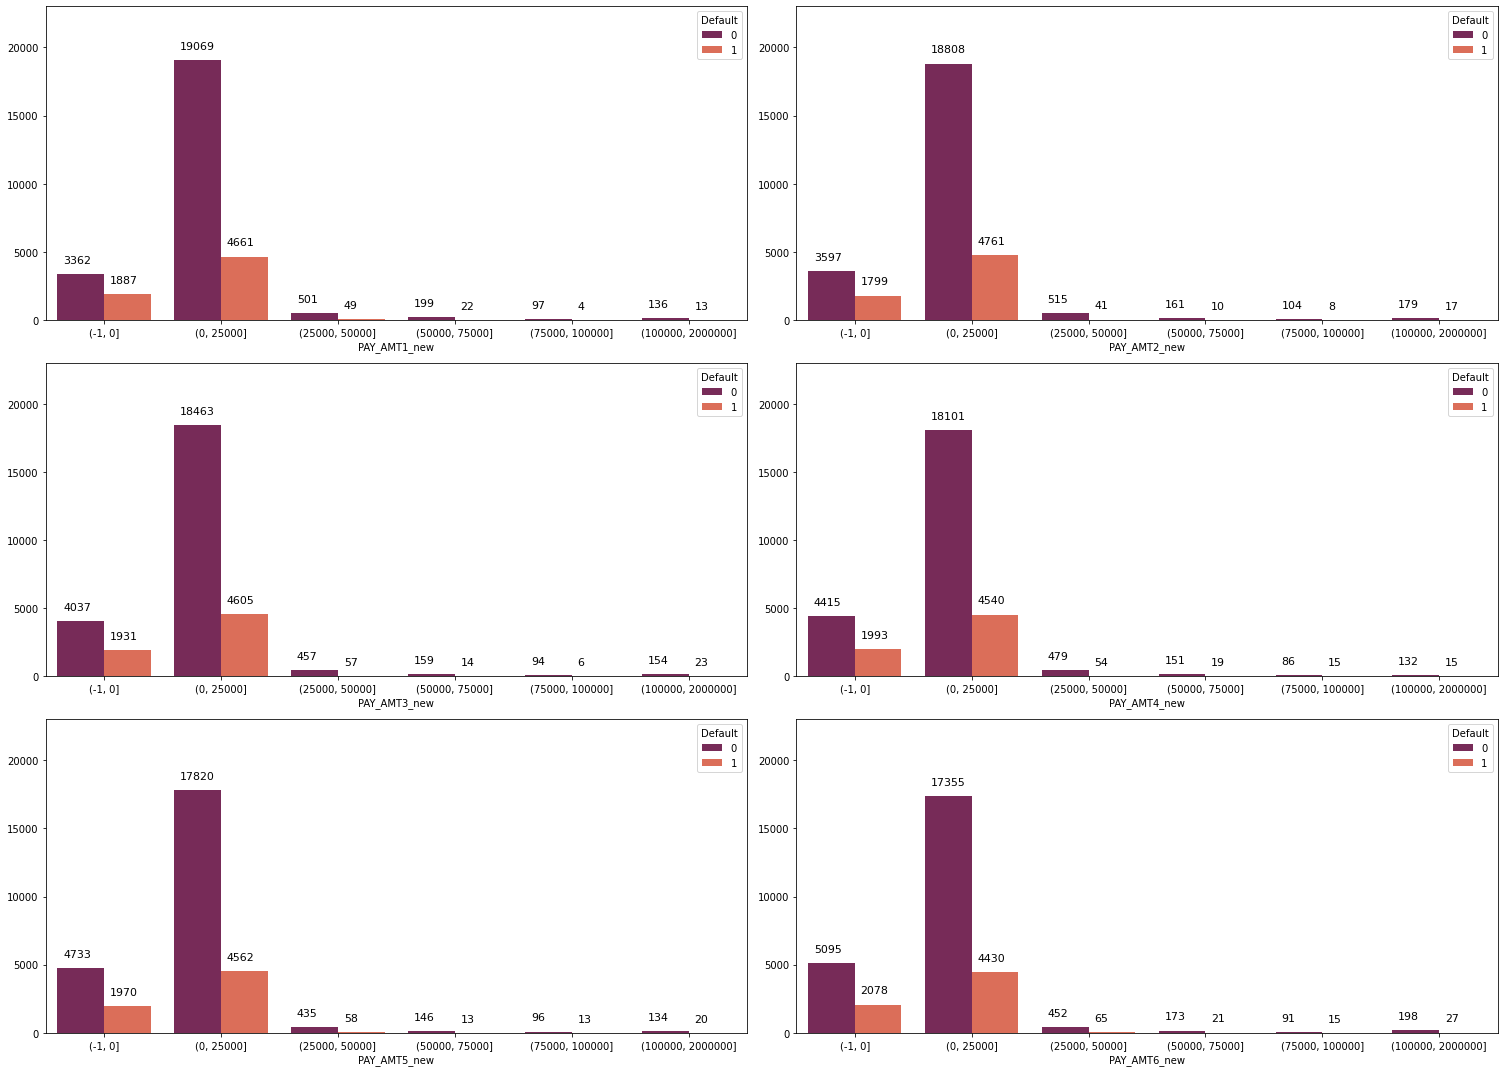

In [80]:
plt.figure(figsize=(21,15))

for i,col in enumerate(pay_amtx_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)    

plt.show()

> CHECKING PROBABILITY DISTRIBUTION OVER PAY_AMT

In [81]:
for col in pay_amtx_new:
    print(df['Default'].groupby(df[col]).value_counts(normalize = True))

PAY_AMT1_new       Default
(-1, 0]            0          0.640503
                   1          0.359497
(0, 25000]         0          0.803582
                   1          0.196418
(25000, 50000]     0          0.910909
                   1          0.089091
(50000, 75000]     0          0.900452
                   1          0.099548
(75000, 100000]    0          0.960396
                   1          0.039604
(100000, 2000000]  0          0.912752
                   1          0.087248
Name: Default, dtype: float64
PAY_AMT2_new       Default
(-1, 0]            0          0.666605
                   1          0.333395
(0, 25000]         0          0.797997
                   1          0.202003
(25000, 50000]     0          0.926259
                   1          0.073741
(50000, 75000]     0          0.941520
                   1          0.058480
(75000, 100000]    0          0.928571
                   1          0.071429
(100000, 2000000]  0          0.913265
                   

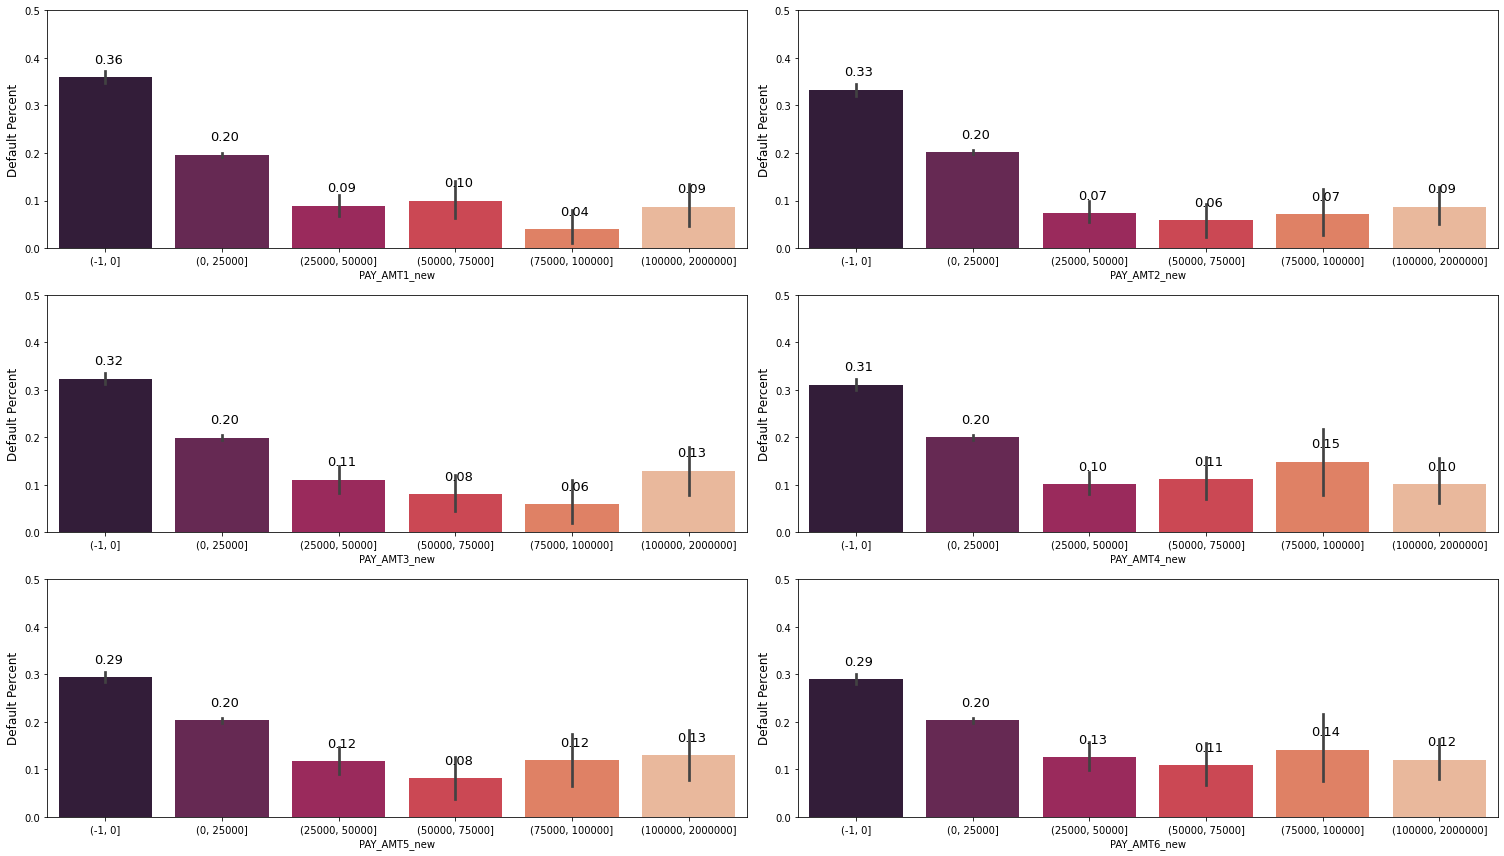

In [82]:
plt.figure(figsize=(21,12))

for i,col in enumerate(pay_amtx_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket')
    plt.ylabel("Default Percent", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.03),fontsize=13)

plt.show()

# MODEL CREATION and EVALUATION

> Based on the Plot Outcomes, Let's try following Model Algorithms

1. Random Forest
2. XG Boost
3. CatBoost

Also, will considered model creation with both Modified data as well as Direct data

In [83]:
data = df.copy().drop('Default', axis = 1)
data_out = df['Default']

In [84]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AgeBin,Limit_Bal_Bin,PAY_1_new,PAY_2_new,PAY_3_new,PAY_4_new,PAY_5_new,PAY_6_new,BILL_AMT1_new,BILL_AMT2_new,BILL_AMT3_new,BILL_AMT4_new,BILL_AMT5_new,BILL_AMT6_new,PAY_AMT1_new,PAY_AMT2_new,PAY_AMT3_new,PAY_AMT4_new,PAY_AMT5_new,PAY_AMT6_new
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,"(20, 25]","(1000, 50000]",2,2,-1,-1,-2,-2,"(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,"(25, 30]","(100000, 150000]",-1,2,0,0,0,2,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]"
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,"(30, 35]","(50000, 100000]",0,0,0,0,0,0,"(25000, 70000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,"(35, 40]","(1000, 50000]",0,0,0,0,0,0,"(25000, 70000]","(25000, 70000]","(25000, 70000]","(25000, 70000]","(25000, 70000]","(25000, 70000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,"(50, 60]","(1000, 50000]",-1,0,-1,0,0,0,"(0, 25000]","(0, 25000]","(25000, 70000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LIMIT_BAL      30000 non-null  float64 
 1   SEX            30000 non-null  int64   
 2   EDUCATION      30000 non-null  int64   
 3   MARRIAGE       30000 non-null  int64   
 4   AGE            30000 non-null  int64   
 5   PAY_1          30000 non-null  int64   
 6   PAY_2          30000 non-null  int64   
 7   PAY_3          30000 non-null  int64   
 8   PAY_4          30000 non-null  int64   
 9   PAY_5          30000 non-null  int64   
 10  PAY_6          30000 non-null  int64   
 11  BILL_AMT1      30000 non-null  float64 
 12  BILL_AMT2      30000 non-null  float64 
 13  BILL_AMT3      30000 non-null  float64 
 14  BILL_AMT4      30000 non-null  float64 
 15  BILL_AMT5      30000 non-null  float64 
 16  BILL_AMT6      30000 non-null  float64 
 17  PAY_AMT1       30000 non-null  

Hence, we can see that we have the modified columns with "_new" suffix. First lets consider direct data for now

In [86]:
database = data.copy().drop(pay_x_new, axis = 1)
database = database.drop(bill_amtx_feat_new, axis = 1)
database = database.drop(pay_amtx_new, axis = 1)
database = database.drop(['AgeBin', 'Limit_Bal_Bin'], axis = 1)
database

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [87]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

> TEST - TRAIN SPLIT

In [88]:
database_train, database_test, data_out_train, data_out_test = train_test_split(database, data_out, test_size = 0.2, random_state = 42, stratify = data_out)

# RANDOM FOREST APPROACH WITHOUT MODIFIED DATA

> Reason for using Random Forest model is to provide a baseline score to compare other models

In [89]:
rf_model = RandomForestClassifier(random_state = 7)

rf_model.fit(database_train, data_out_train)
pred_rf = rf_model.predict(database_test)

print("Test Accuracy: ",metrics.accuracy_score(data_out_test, pred_rf))

Test Accuracy:  0.8113333333333334


> CONFUSION MATRIX 

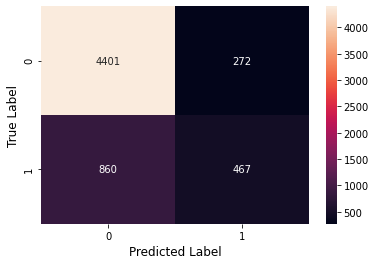

In [90]:
rf_confusion_matrix = metrics.confusion_matrix(data_out_test, pred_rf)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="2g")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

> Hence, we can clearly see that Accuracy is not the only parameter to decide the model algorithm ofcourse.

1. As True Negative value is worse in this case, i.e. is almost double the value of True Positive

In [91]:
print(metrics.classification_report(data_out_test, pred_rf, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



> AREA UNDER CURVE - RECEIEVER CHARACTERISTICS OPERATOR (AUC -ROC)

ROC_AUC:  0.7554387782368561


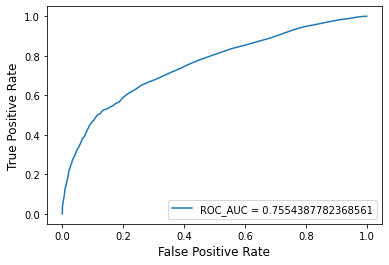

In [92]:
rf_pred_proba = rf_model.predict_proba(database_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(data_out_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(data_out_test, rf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = {}'.format(rf_roc_auc))

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

# RANDOM FOREST CLASSIFIER WITH MODIFIED DATA


In [93]:
data_new = data.copy().drop(pay_x_new, axis = 1)
data_new = data_new.drop(bill_amtx_feat_new, axis = 1)
data_new = data_new.drop(['AgeBin', 'Limit_Bal_Bin'], axis = 1)

data_new

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AMT1_new,PAY_AMT2_new,PAY_AMT3_new,PAY_AMT4_new,PAY_AMT5_new,PAY_AMT6_new
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,"(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,"(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]"
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,"(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]"
29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,"(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"


In [94]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LIMIT_BAL     30000 non-null  float64 
 1   SEX           30000 non-null  int64   
 2   EDUCATION     30000 non-null  int64   
 3   MARRIAGE      30000 non-null  int64   
 4   AGE           30000 non-null  int64   
 5   PAY_1         30000 non-null  int64   
 6   PAY_2         30000 non-null  int64   
 7   PAY_3         30000 non-null  int64   
 8   PAY_4         30000 non-null  int64   
 9   PAY_5         30000 non-null  int64   
 10  PAY_6         30000 non-null  int64   
 11  BILL_AMT1     30000 non-null  float64 
 12  BILL_AMT2     30000 non-null  float64 
 13  BILL_AMT3     30000 non-null  float64 
 14  BILL_AMT4     30000 non-null  float64 
 15  BILL_AMT5     30000 non-null  float64 
 16  BILL_AMT6     30000 non-null  float64 
 17  PAY_AMT1      30000 non-null  float64 
 18  PAY_AM

In [95]:
le = LabelEncoder()

for col in pay_amtx_new:
    data_new[col] = le.fit_transform(data_new[col])

In [96]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LIMIT_BAL     30000 non-null  float64
 1   SEX           30000 non-null  int64  
 2   EDUCATION     30000 non-null  int64  
 3   MARRIAGE      30000 non-null  int64  
 4   AGE           30000 non-null  int64  
 5   PAY_1         30000 non-null  int64  
 6   PAY_2         30000 non-null  int64  
 7   PAY_3         30000 non-null  int64  
 8   PAY_4         30000 non-null  int64  
 9   PAY_5         30000 non-null  int64  
 10  PAY_6         30000 non-null  int64  
 11  BILL_AMT1     30000 non-null  float64
 12  BILL_AMT2     30000 non-null  float64
 13  BILL_AMT3     30000 non-null  float64
 14  BILL_AMT4     30000 non-null  float64
 15  BILL_AMT5     30000 non-null  float64
 16  BILL_AMT6     30000 non-null  float64
 17  PAY_AMT1      30000 non-null  float64
 18  PAY_AMT2      30000 non-nu

In [97]:
data_new_train, data_new_test, data_out_train, data_out_test = train_test_split(data_new, data_out, test_size = 0.2, random_state = 7, stratify = data_out)

In [98]:
rf_model_new = RandomForestClassifier(random_state = 7)

rf_model_new.fit(data_new_train, data_out_train)
pred_rf_new = rf_model_new.predict(data_new_test)

print("Test Accuracy: ",metrics.accuracy_score(data_out_test, pred_rf_new))

Test Accuracy:  0.8231666666666667


> CONFUSION MATRIX

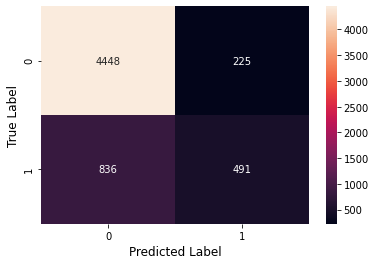

In [99]:
rf_confusion_matrix = metrics.confusion_matrix(data_out_test, pred_rf_new)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="2g")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

ROC_AUC:  0.7830107895877987


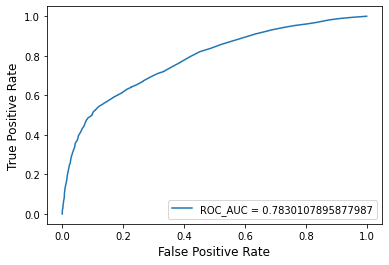

In [100]:
rf_pred_proba_new = rf_model_new.predict_proba(data_new_test)[:,1]

rf_roc_auc_new = metrics.roc_auc_score(data_out_test, rf_pred_proba_new)
print('ROC_AUC: ', rf_roc_auc_new)

rf_new_fpr, rf_new_tpr, thresholds_new = metrics.roc_curve(data_out_test, rf_pred_proba_new)

plt.plot(rf_new_fpr,rf_new_tpr, label = 'ROC_AUC = {}'.format(rf_roc_auc_new))

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

Hence, AUC -ROC has been increased by 3% hence, data modification made is under right criteria.

>XG BOOST WITHOUT MODIFIED DATA

In [101]:
data_xg = database.copy()
data_xg_out = data_out.copy()

In [102]:
from sklearn.model_selection import train_test_split
data_xg_train, data_xg_test, data_xg_out_train, data_xg_out_test = train_test_split(data_xg, data_xg_out, test_size = 0.25)

In [103]:
param_grid = {
        'gamma': [0.5, 1, 5],   # regularization parameter 
        'subsample': [0.3,  0.7, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [ 5, 6] # depth of each tree
        }

In [104]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.01, n_estimators=100, eval_metric='logloss', use_label_encoder=False)
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(data_xg_train, data_xg_out_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3, score=0.822, total=   2.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3, score=0.822, total=   2.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3, score=0.818, total=   2.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3 .....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3, score=0.815, total=   2.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.3, score=0.815, total=   2.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.7 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.7, score=0.822, total=   2.5s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.7 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.7, score=0.821, total=   2.5s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.7 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.7, score=0.817, total=   2.5s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.7 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.7, score=0.816, total=   2.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, subsample=0.7 .....
[CV]  cols

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 13.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='logloss',
                                     gamma=0, learning_rate=0.01,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, use_label_encoder=False,
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 

In [105]:
data_out_xg_prob=grid.predict_proba(data_xg_test)
data_out_xg_pred = grid.predict(data_xg_test)

Test Accuracy:  0.8196


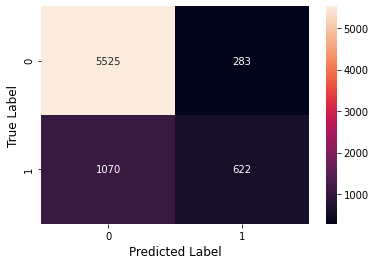

In [106]:
rf_confusion_matrix = metrics.confusion_matrix(data_xg_out_test, data_out_xg_pred)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="2g")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
print("Test Accuracy: ",metrics.accuracy_score(data_xg_out_test, data_out_xg_pred))
plt.show()

Accuracy seems to be increased but, the True Positive and True Negative proportion is in same ratio as of the Random Forest Model Metrics

>CATBOOST WITHOUT MODIFIED DATA

In [107]:
X = df.copy().drop('Default', axis = 1)
Y = df['Default']

In [108]:
X_base = X.copy().drop(pay_x_new, axis = 1)
X_base = X_base.drop(bill_amtx_feat_new, axis = 1)
X_base = X_base.drop(pay_amtx_new, axis = 1)
X_base = X_base.drop(['AgeBin', 'Limit_Bal_Bin'], axis = 1)
X_base

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [109]:
X_base_train, X_base_test, Y_train, Y_test = train_test_split(X_base, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [110]:
categorical_ft_base = ['SEX', 'EDUCATION', 'MARRIAGE']

cat_model = CatBoostClassifier (random_state = 42, eval_metric = 'AUC')
cat_model.fit(X_base_train, Y_train, early_stopping_rounds = 100, eval_set = [(X_base_test,Y_test)], cat_features = categorical_ft_base)
pred_cat = cat_model.predict(X_base_test)

Learning rate set to 0.069474
0:	test: 0.7240948	best: 0.7240948 (0)	total: 89.3ms	remaining: 1m 29s
1:	test: 0.7468602	best: 0.7468602 (1)	total: 122ms	remaining: 1m 1s
2:	test: 0.7527917	best: 0.7527917 (2)	total: 153ms	remaining: 50.9s
3:	test: 0.7581769	best: 0.7581769 (3)	total: 188ms	remaining: 46.7s
4:	test: 0.7606414	best: 0.7606414 (4)	total: 226ms	remaining: 44.9s
5:	test: 0.7621206	best: 0.7621206 (5)	total: 260ms	remaining: 43.1s
6:	test: 0.7637831	best: 0.7637831 (6)	total: 292ms	remaining: 41.4s
7:	test: 0.7631455	best: 0.7637831 (6)	total: 327ms	remaining: 40.5s
8:	test: 0.7642865	best: 0.7642865 (8)	total: 359ms	remaining: 39.5s
9:	test: 0.7633631	best: 0.7642865 (8)	total: 390ms	remaining: 38.6s
10:	test: 0.7632833	best: 0.7642865 (8)	total: 422ms	remaining: 38s
11:	test: 0.7636472	best: 0.7642865 (8)	total: 470ms	remaining: 38.7s
12:	test: 0.7637678	best: 0.7642865 (8)	total: 504ms	remaining: 38.3s
13:	test: 0.7648081	best: 0.7648081 (13)	total: 550ms	remaining: 38.7s

In [111]:
print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_cat))

Test Accuracy:  0.8171666666666667


So, this shows it provides accuracy same as XG Boost model with modified Features

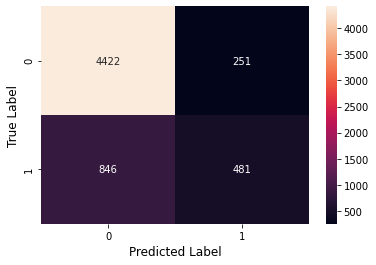

In [112]:

cat_confusion_matrix = metrics.confusion_matrix(Y_test, pred_cat)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [113]:
print(metrics.classification_report(Y_test, pred_cat, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



ROC_AUC:  0.780495659540102


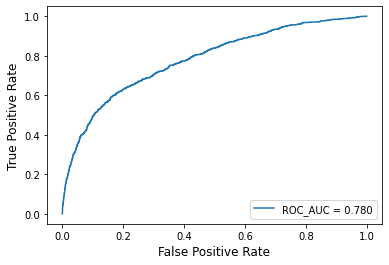

In [114]:
cat_pred_proba = cat_model.predict_proba(X_base_test)[:,1]

cat_roc_auc = metrics.roc_auc_score(Y_test, cat_pred_proba)
print('ROC_AUC: ', cat_roc_auc)

cat_fpr, cat_tpr, thresholds = metrics.roc_curve(Y_test, cat_pred_proba)

plt.plot(cat_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % cat_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

> CATBOOST WITH MODIFIED DATA

In [115]:
X_new = X.copy().drop(pay_x_new, axis = 1)
X_new = X_new.drop(bill_amtx_feat_new, axis = 1)
X_new = X_new.drop(['AgeBin', 'Limit_Bal_Bin'], axis = 1)

X_new

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AMT1_new,PAY_AMT2_new,PAY_AMT3_new,PAY_AMT4_new,PAY_AMT5_new,PAY_AMT6_new
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,"(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,"(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]"
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,"(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]"
29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,"(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"


In [116]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LIMIT_BAL     30000 non-null  float64 
 1   SEX           30000 non-null  int64   
 2   EDUCATION     30000 non-null  int64   
 3   MARRIAGE      30000 non-null  int64   
 4   AGE           30000 non-null  int64   
 5   PAY_1         30000 non-null  int64   
 6   PAY_2         30000 non-null  int64   
 7   PAY_3         30000 non-null  int64   
 8   PAY_4         30000 non-null  int64   
 9   PAY_5         30000 non-null  int64   
 10  PAY_6         30000 non-null  int64   
 11  BILL_AMT1     30000 non-null  float64 
 12  BILL_AMT2     30000 non-null  float64 
 13  BILL_AMT3     30000 non-null  float64 
 14  BILL_AMT4     30000 non-null  float64 
 15  BILL_AMT5     30000 non-null  float64 
 16  BILL_AMT6     30000 non-null  float64 
 17  PAY_AMT1      30000 non-null  float64 
 18  PAY_AM

In [117]:
le = LabelEncoder()

for col in pay_amtx_new:
    X_new[col] = le.fit_transform(X_new[col])

In [118]:
X_new_train, X_new_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [119]:
categorical_ft_new = ['SEX', 'EDUCATION', 'MARRIAGE'
                      , 'PAY_AMT1_new', 'PAY_AMT2_new', 'PAY_AMT3_new', 'PAY_AMT4_new', 'PAY_AMT5_new', 'PAY_AMT6_new']

print(categorical_ft_new)

cat_model_new = CatBoostClassifier (random_state = 42, eval_metric = 'AUC')
cat_model_new.fit(X_new_train, Y_train, early_stopping_rounds = 100, eval_set = [(X_new_test,Y_test)], cat_features = categorical_ft_new)
pred_cat_new = cat_model_new.predict(X_new_test)

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_AMT1_new', 'PAY_AMT2_new', 'PAY_AMT3_new', 'PAY_AMT4_new', 'PAY_AMT5_new', 'PAY_AMT6_new']
Learning rate set to 0.069474
0:	test: 0.7347047	best: 0.7347047 (0)	total: 75.9ms	remaining: 1m 15s
1:	test: 0.7455631	best: 0.7455631 (1)	total: 138ms	remaining: 1m 8s
2:	test: 0.7592147	best: 0.7592147 (2)	total: 202ms	remaining: 1m 7s
3:	test: 0.7627925	best: 0.7627925 (3)	total: 279ms	remaining: 1m 9s
4:	test: 0.7634384	best: 0.7634384 (4)	total: 345ms	remaining: 1m 8s
5:	test: 0.7619652	best: 0.7634384 (4)	total: 405ms	remaining: 1m 7s
6:	test: 0.7621524	best: 0.7634384 (4)	total: 476ms	remaining: 1m 7s
7:	test: 0.7637813	best: 0.7637813 (7)	total: 553ms	remaining: 1m 8s
8:	test: 0.7644517	best: 0.7644517 (8)	total: 622ms	remaining: 1m 8s
9:	test: 0.7651018	best: 0.7651018 (9)	total: 684ms	remaining: 1m 7s
10:	test: 0.7655489	best: 0.7655489 (10)	total: 743ms	remaining: 1m 6s
11:	test: 0.7659620	best: 0.7659620 (11)	total: 817ms	remaining: 1m 7s
12:	tes

In [120]:
print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_cat_new))

Test Accuracy:  0.8195


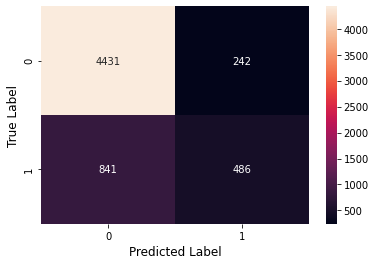

In [121]:
cat_new_confusion_matrix = metrics.confusion_matrix(Y_test, pred_cat_new)
sns.heatmap(cat_new_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

Support Vector Classifier - RandomizedSearchCV

In [122]:
from sklearn.svm import SVC

In [123]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

In [124]:
SVM_Model = SVC(gamma='auto')

In [125]:
from sklearn.model_selection import RandomizedSearchCV 
random_Grid = RandomizedSearchCV (estimator = SVM_Model, param_distributions = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [127]:
y = df['Default']

#Load X Variables into a Pandas Dataframe with columns 
X = X_new.copy().drop(['PAY_AMT1_new', 'PAY_AMT2_new', 'PAY_AMT3_new', 'PAY_AMT4_new', 'PAY_AMT5_new', 'PAY_AMT6_new'], axis = 1)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [141]:
random_Grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 26.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [142]:
y_pred = random_Grid.predict(X_test)

In [143]:
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Test Accuracy:  0.7796666666666666


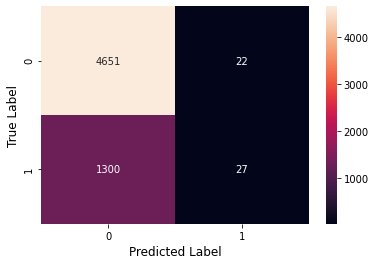

In [145]:
grid_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(grid_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

SVC : Grid SearchCV

In [146]:
from sklearn.model_selection import GridSearchCV 
Grid_Search = GridSearchCV (estimator = SVM_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [147]:
Grid_Search.fit(X_train,Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 24.3min
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed: 65.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [149]:
y_pred_new = Grid_Search.predict(X_test)

In [152]:
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred_new))

Test Accuracy:  0.7803333333333333


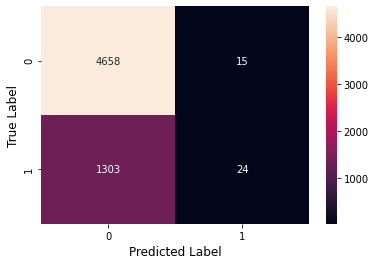

In [154]:
grid_confusion_matrix_1 = metrics.confusion_matrix(y_test, y_pred_new)
sns.heatmap(grid_confusion_matrix_1, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

 Random Forest : 